<a href="https://colab.research.google.com/github/harishgovardhandamodar/Apple-M1-Tensorflow/blob/main/Fitbit_Trend.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
library(tidyverse)
library(lubridate)
library(dplyr)
library(ggplot2)
library(tidyr)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.4.4     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [5]:
activity <- read.csv('./fitbit/dailyActivity_merged.csv')
calories <- read.csv("./fitbit/hourlyCalories_merged.csv")
intensities <- read.csv("./fitbit/hourlyIntensities_merged.csv")
sleep <- read.csv("./fitbit/sleepDay_merged.csv")
weight <- read.csv("./fitbit/weightLogInfo_merged.csv")

In [6]:
head(activity)

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
,<dbl>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>
1,1503960366,4/12/2016,13162,8.50,8.50,0,1.88,0.55,6.06,0,25,13,328,728,1985
2,1503960366,4/13/2016,10735,6.97,6.97,0,1.57,0.69,4.71,0,21,19,217,776,1797
3,1503960366,4/14/2016,10460,6.74,6.74,0,2.44,0.40,3.91,0,30,11,181,1218,1776
4,1503960366,4/15/2016,9762,6.28,6.28,0,2.14,1.26,2.83,0,29,34,209,726,1745
5,1503960366,4/16/2016,12669,8.16,8.16,0,2.71,0.41,5.04,0,36,10,221,773,1863
6,1503960366,4/17/2016,9705,6.48,6.48,0,3.19,0.78,2.51,0,38,20,164,539,1728


In [7]:
head(sleep)

,Id,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
,<dbl>,<chr>,<int>,<int>,<int>
1,1503960366,4/12/2016 12:00:00 AM,1,327,346
2,1503960366,4/13/2016 12:00:00 AM,2,384,407
3,1503960366,4/15/2016 12:00:00 AM,1,412,442
4,1503960366,4/16/2016 12:00:00 AM,2,340,367
5,1503960366,4/17/2016 12:00:00 AM,1,700,712
6,1503960366,4/19/2016 12:00:00 AM,1,304,320


In [8]:
# intensities
intensities$ActivityHour=as.POSIXct(intensities$ActivityHour, format="%m/%d/%Y %I:%M:%S %p", tz=Sys.timezone())
intensities$time <- format(intensities$ActivityHour, format = "%H:%M:%S")
intensities$date <- format(intensities$ActivityHour, format = "%m/%d/%y")
# calories
calories$ActivityHour=as.POSIXct(calories$ActivityHour, format="%m/%d/%Y %I:%M:%S %p", tz=Sys.timezone())
calories$time <- format(calories$ActivityHour, format = "%H:%M:%S")
calories$date <- format(calories$ActivityHour, format = "%m/%d/%y")
# activity
activity$ActivityDate=as.POSIXct(activity$ActivityDate, format="%m/%d/%Y", tz=Sys.timezone())
activity$date <- format(activity$ActivityDate, format = "%m/%d/%y")
# sleep
sleep$SleepDay=as.POSIXct(sleep$SleepDay, format="%m/%d/%Y %I:%M:%S %p", tz=Sys.timezone())
sleep$date <- format(sleep$SleepDay, format = "%m/%d/%y")

In [9]:
n_distinct(activity$Id)
n_distinct(calories$Id)
n_distinct(intensities$Id)
n_distinct(sleep$Id)
n_distinct(weight$Id)

[1] 33

[1] 33

[1] 33

[1] 24

[1] 8

In [10]:
# activity
activity %>%
  select(TotalSteps,
         TotalDistance,
         SedentaryMinutes, Calories) %>%
  summary()

# explore num of active minutes per category
activity %>%
  select(VeryActiveMinutes, FairlyActiveMinutes, LightlyActiveMinutes) %>%
  summary()

# calories
calories %>%
  select(Calories) %>%
  summary()
# sleep
sleep %>%
  select(TotalSleepRecords, TotalMinutesAsleep, TotalTimeInBed) %>%
  summary()
# weight
weight %>%
  select(WeightKg, BMI) %>%
  summary()

   TotalSteps    TotalDistance    SedentaryMinutes    Calories   
 Min.   :    0   Min.   : 0.000   Min.   :   0.0   Min.   :   0  
 1st Qu.: 3790   1st Qu.: 2.620   1st Qu.: 729.8   1st Qu.:1828  
 Median : 7406   Median : 5.245   Median :1057.5   Median :2134  
 Mean   : 7638   Mean   : 5.490   Mean   : 991.2   Mean   :2304  
 3rd Qu.:10727   3rd Qu.: 7.713   3rd Qu.:1229.5   3rd Qu.:2793  
 Max.   :36019   Max.   :28.030   Max.   :1440.0   Max.   :4900  

 VeryActiveMinutes FairlyActiveMinutes LightlyActiveMinutes
 Min.   :  0.00    Min.   :  0.00      Min.   :  0.0       
 1st Qu.:  0.00    1st Qu.:  0.00      1st Qu.:127.0       
 Median :  4.00    Median :  6.00      Median :199.0       
 Mean   : 21.16    Mean   : 13.56      Mean   :192.8       
 3rd Qu.: 32.00    3rd Qu.: 19.00      3rd Qu.:264.0       
 Max.   :210.00    Max.   :143.00      Max.   :518.0       

    Calories     
 Min.   : 42.00  
 1st Qu.: 63.00  
 Median : 83.00  
 Mean   : 97.39  
 3rd Qu.:108.00  
 Max.   :948.00  

 TotalSleepRecords TotalMinutesAsleep TotalTimeInBed 
 Min.   :1.000     Min.   : 58.0      Min.   : 61.0  
 1st Qu.:1.000     1st Qu.:361.0      1st Qu.:403.0  
 Median :1.000     Median :433.0      Median :463.0  
 Mean   :1.119     Mean   :419.5      Mean   :458.6  
 3rd Qu.:1.000     3rd Qu.:490.0      3rd Qu.:526.0  
 Max.   :3.000     Max.   :796.0      Max.   :961.0  

    WeightKg           BMI       
 Min.   : 52.60   Min.   :21.45  
 1st Qu.: 61.40   1st Qu.:23.96  
 Median : 62.50   Median :24.39  
 Mean   : 72.04   Mean   :25.19  
 3rd Qu.: 85.05   3rd Qu.:25.56  
 Max.   :133.50   Max.   :47.54  

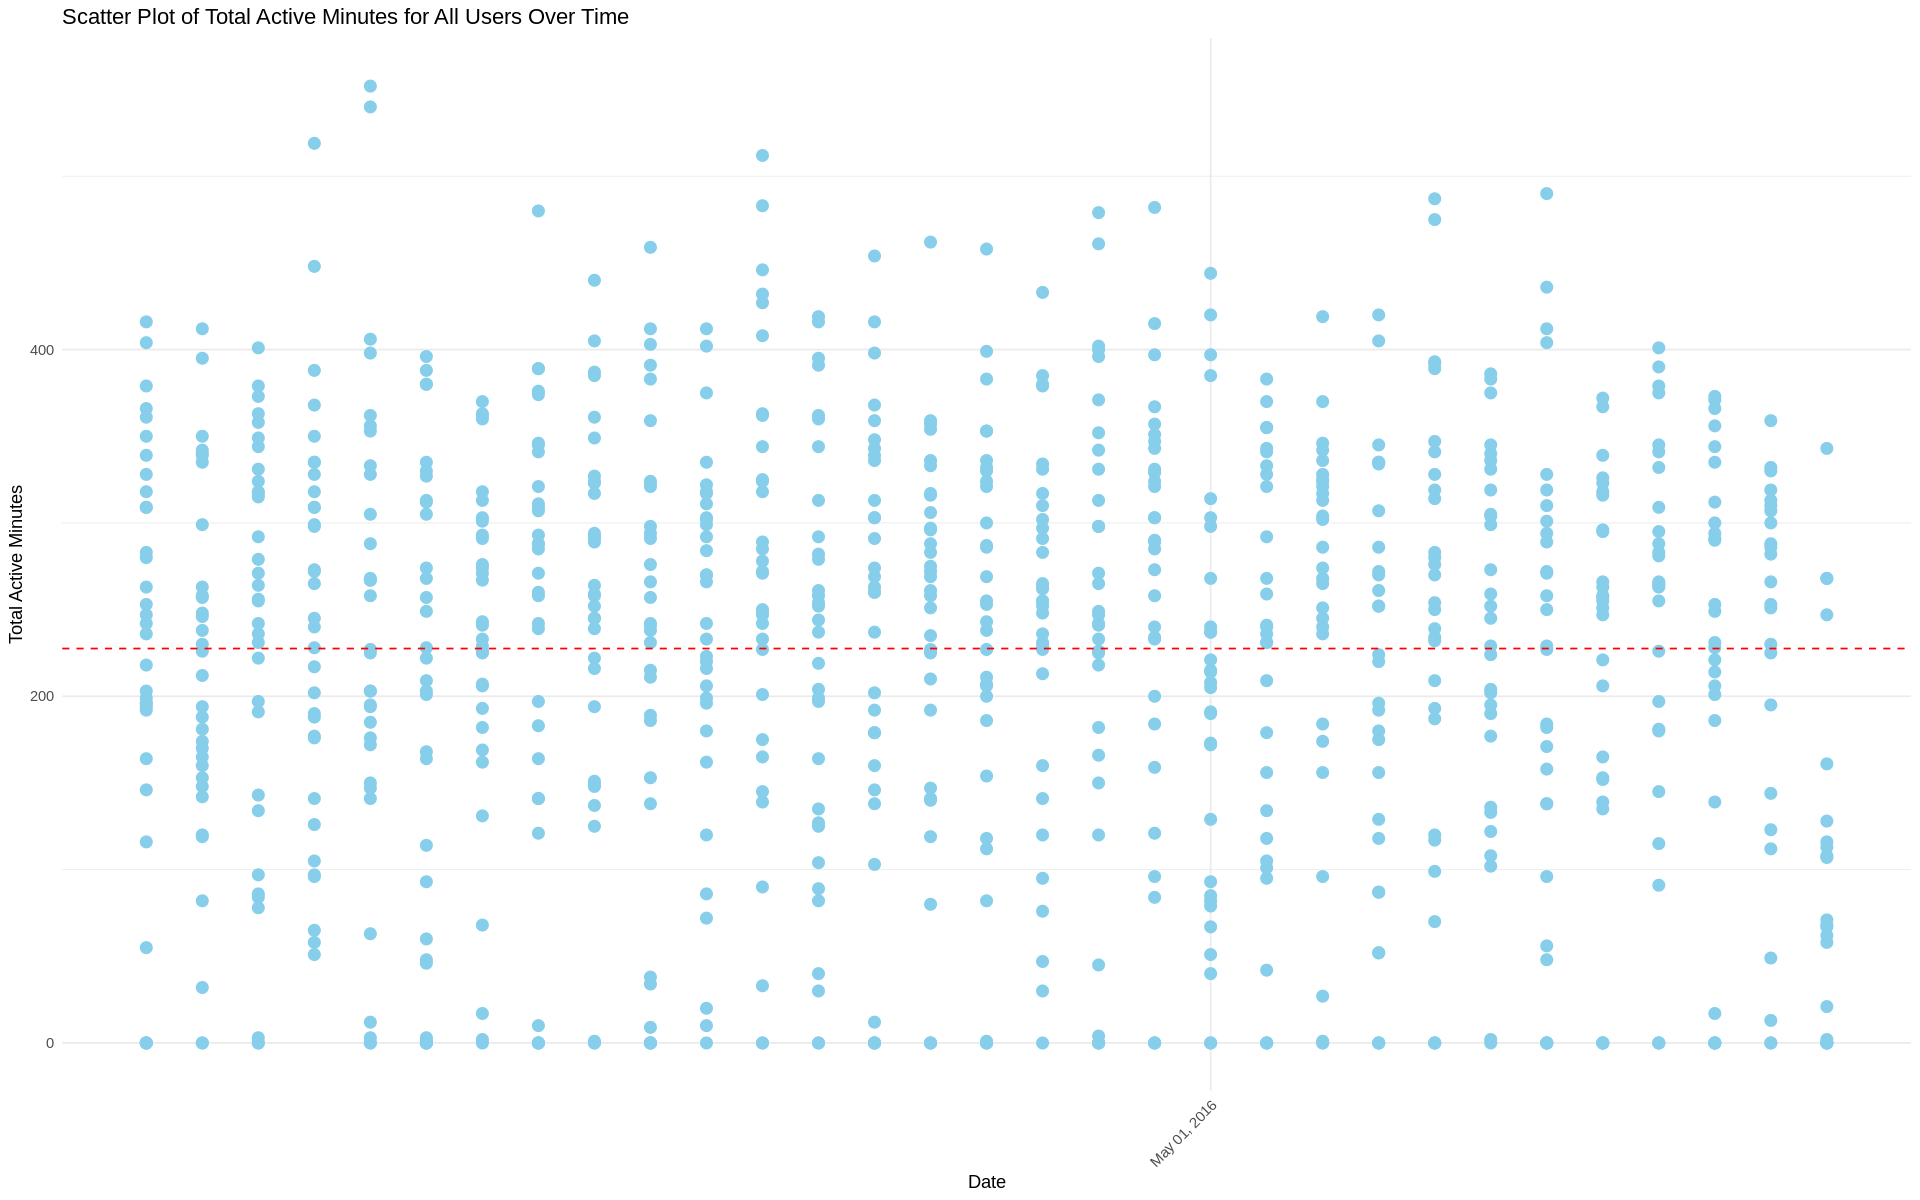

In [11]:
# Load necessary libraries
library(dplyr)
library(ggplot2)

# If 'ActivityDate' is not in Date format, convert it
activity$ActivityDate <- as.Date(activity$ActivityDate, format='%m/%d/%Y')

# Calculate total active minutes for each date and create the 'TotalActiveMinutes' column
activity$TotalActiveMinutes <- activity$VeryActiveMinutes +
                              activity$FairlyActiveMinutes +
                              activity$LightlyActiveMinutes

# Calculate the average total active minutes
avg_total_active <- mean(activity$TotalActiveMinutes)

# Set a larger figure size
options(repr.plot.width=16, repr.plot.height=10)

# Plot the scatter plot
ggplot(activity, aes(x = ActivityDate, y = TotalActiveMinutes)) +
  geom_point(col='skyblue', size=3) +
  geom_hline(yintercept = avg_total_active, linetype = "dashed", color = "red") +
  labs(title='Scatter Plot of Total Active Minutes for All Users Over Time',
       x='Date', y='Total Active Minutes') +
  theme_minimal() +
  scale_x_date(date_breaks = "1 month", date_labels = "%b %d, %Y") +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))


This is a cluttered scatter plot, but it shows some trends in regard to total active minutes for each date mentioned in the data. The overall average for all users for the entire period (red line) is interesting.

Let’s have a look at the total active minutes per day of the week:

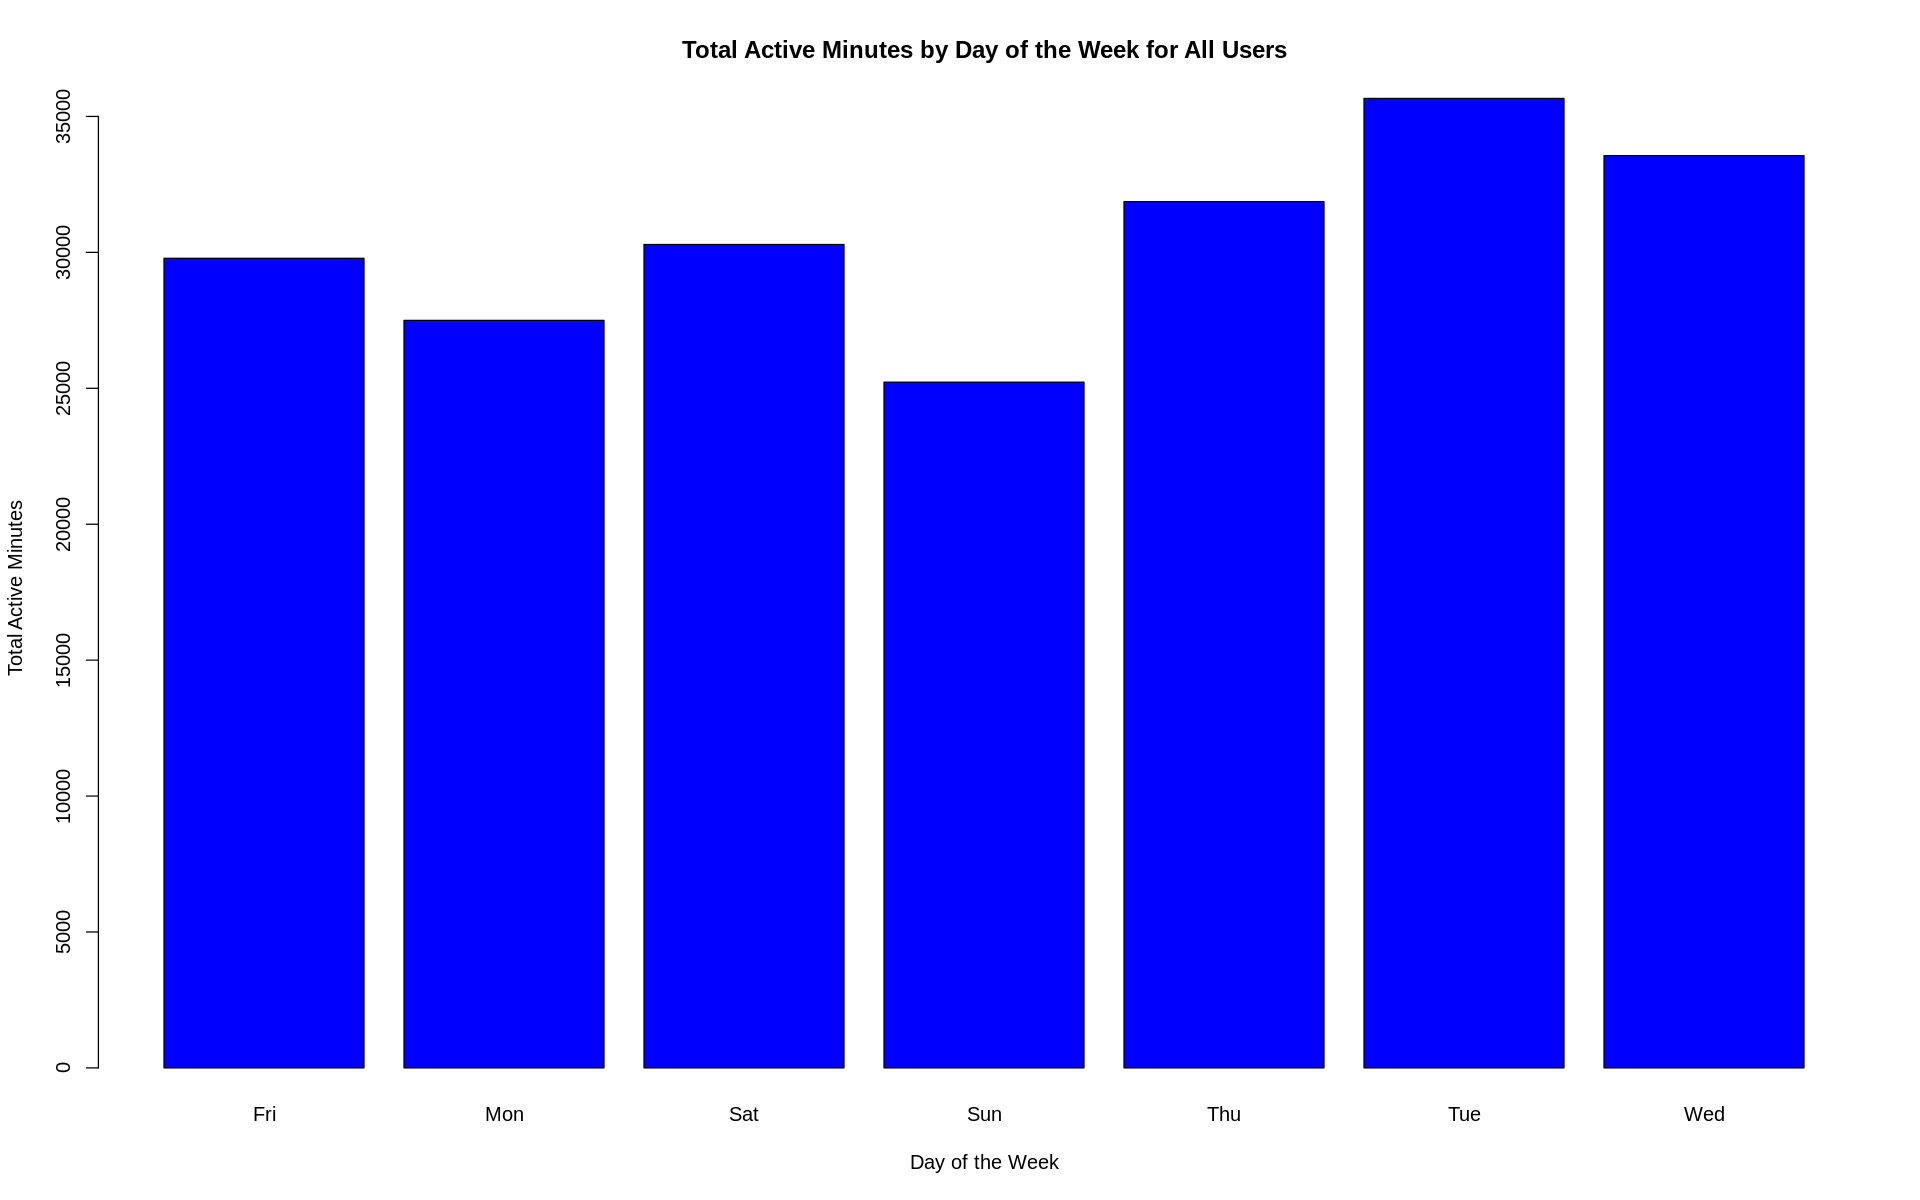

In [12]:
# If 'ActivityDate' is not in Date format, convert it
activity$ActivityDate <- as.Date(activity$ActivityDate, format='%m/%d/%Y')

# Calculate total active minutes
activity$TotalActiveMinutes <- activity$VeryActiveMinutes +
                              activity$FairlyActiveMinutes +
                              activity$LightlyActiveMinutes

# Group by day of the week and calculate total active minutes
activity_by_day <- aggregate(TotalActiveMinutes ~ weekdays(ActivityDate, TRUE), data = activity, sum)

# Rename the day of the week column
colnames(activity_by_day) <- c("DayOfWeek", "TotalActiveMinutes")

# Reorder the days of the week based on total active minutes
activity_by_day$DayOfWeek <- factor(activity_by_day$DayOfWeek,
                                    levels = activity_by_day$DayOfWeek[order(activity_by_day$TotalActiveMinutes, decreasing = TRUE)])

# Set a larger figure size
options(repr.plot.width=16, repr.plot.height=10)

# Plot the results with day labels
barplot(activity_by_day$TotalActiveMinutes, names.arg=activity_by_day$DayOfWeek,
        col='blue', main='Total Active Minutes by Day of the Week for All Users',
        xlab='Day of the Week', ylab='Total Active Minutes', border='black')


We can see that most activity happens on Tuesdays and the least amount of activity occurs on Sunday. Could these trends help **Bellabeat app** increase user engagement?

ERROR: ignored

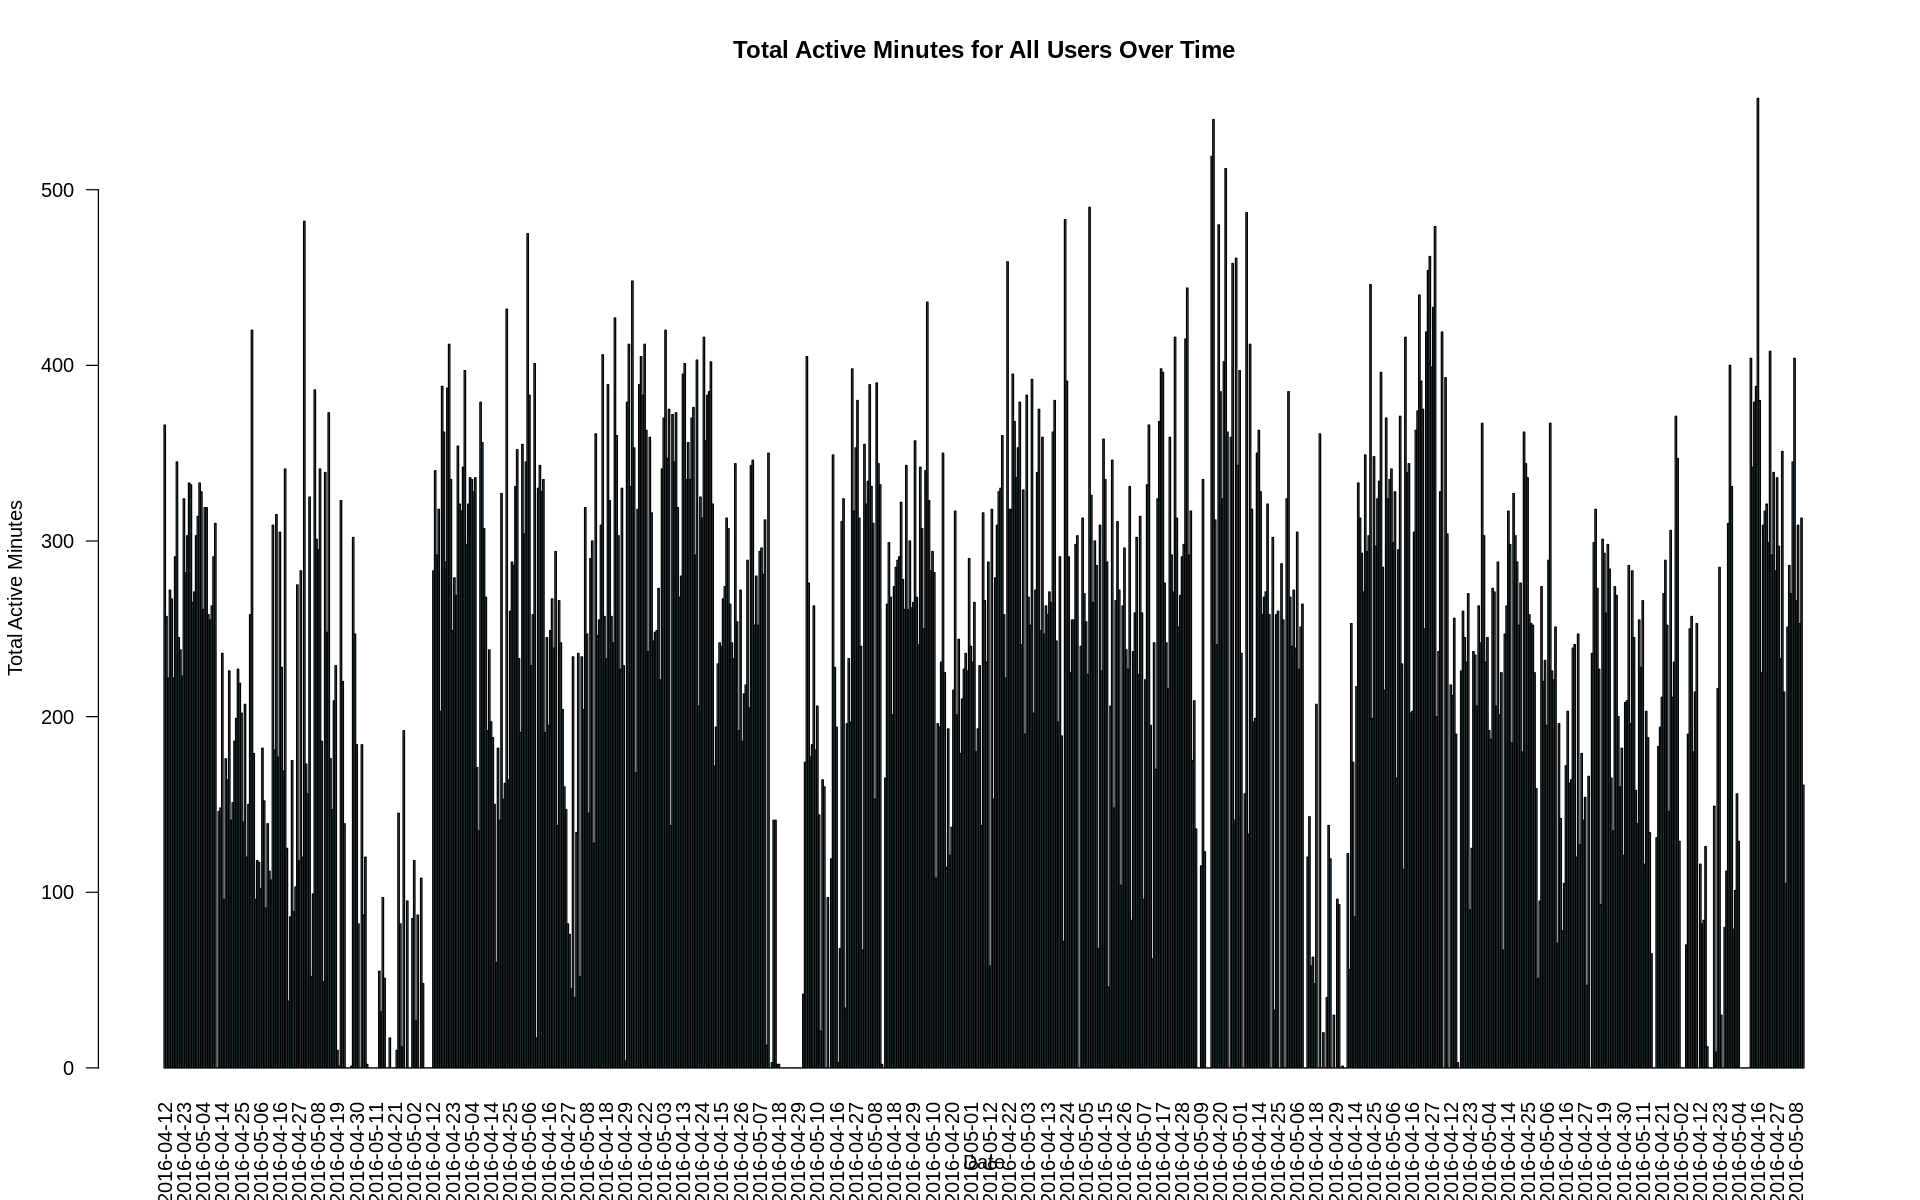

In [13]:
# If 'ActivityDate' is not in Date format, convert it
activity$ActivityDate <- as.Date(activity$ActivityDate, format='%m/%d/%Y')

# Calculate total active minutes for each date
activity$TotalActiveMinutes <- activity$VeryActiveMinutes +
                              activity$FairlyActiveMinutes +
                              activity$LightlyActiveMinutes

# Set a larger figure size
options(repr.plot.width=16, repr.plot.height=10)

# Plot the bar chart
barplot(activity$TotalActiveMinutes,
        names.arg=activity$ActivityDate,
        col='skyblue', main='Total Active Minutes for All Users Over Time',
        xlab='Date', ylab='Total Active Minutes', border='black', las=2)

# Customize the plot
grid(lty=1, col='gray', alpha=0.75)

Let's see if there is a clear correlation between Calories (burned) and total steps:

`geom_smooth()` using formula = 'y ~ x'


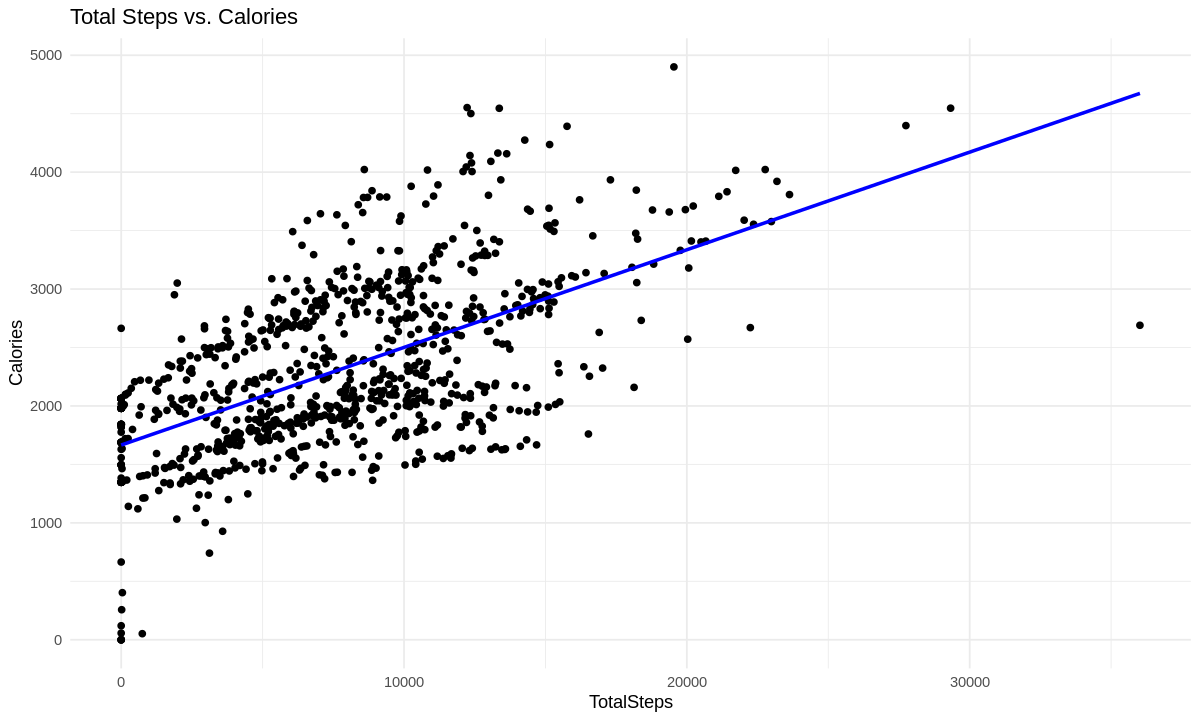

In [14]:
# Load necessary libraries
library(ggplot2)

# Set a larger plot size
options(repr.plot.width=10, repr.plot.height=6)

# Scatter plot with regression line
ggplot(activity, aes(x = TotalSteps, y = Calories)) +
  geom_point() +
  geom_smooth(method = "lm", se = FALSE, color = "blue") +
  labs(title = "Total Steps vs. Calories") +
  theme_minimal()

We see a positive correlation.
Let's get an idea of the dsitribution of per day of all activity.

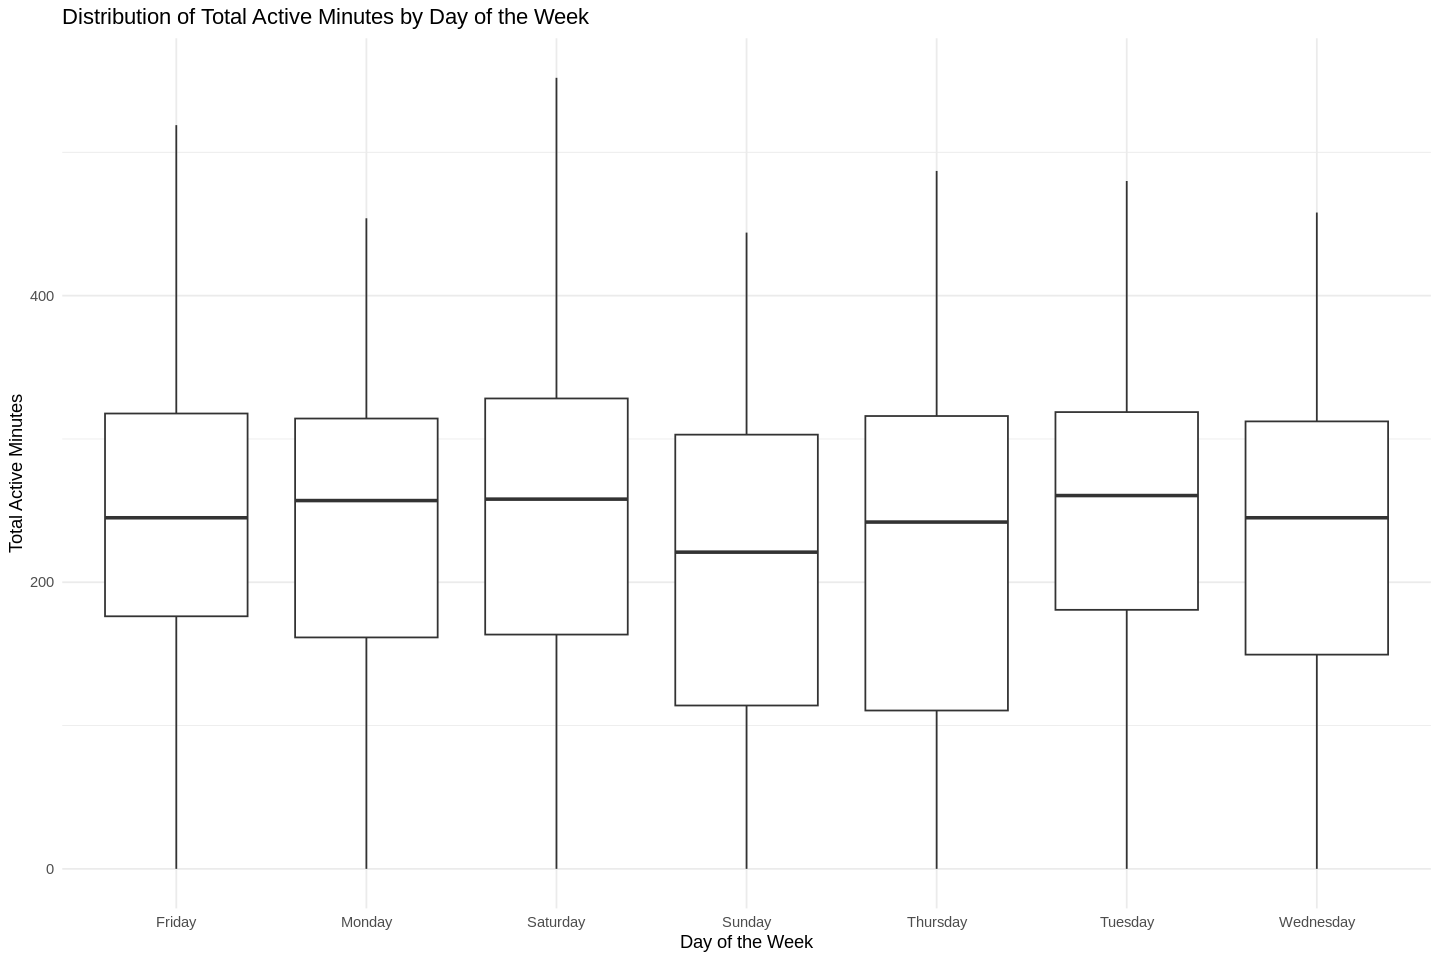

In [15]:
# Load necessary libraries
library(ggplot2)
library(dplyr)
# Create a new column 'TotalActiveMinutes'
activity$TotalActiveMinutes <-
  activity$VeryActiveMinutes +
  activity$FairlyActiveMinutes +
  activity$LightlyActiveMinutes

# Convert 'ActivityDate' to datetime format if not already
activity$ActivityDate <- as.Date(activity$ActivityDate)

# Extract the day of the week from 'ActivityDate'
activity$DayOfWeek <- weekdays(activity$ActivityDate)

# Set up the figure and axis
options(repr.plot.width=12, repr.plot.height=8)

# Create a box plot to visualize the distribution of TotalActiveMinutes by day of the week
ggplot(activity, aes(x = factor(DayOfWeek, ordered = TRUE), y = TotalActiveMinutes)) +
  geom_boxplot() +
  labs(title = 'Distribution of Total Active Minutes by Day of the Week', x = 'Day of the Week', y = 'Total Active Minutes') +
  theme_minimal()

We see a thorough distribution of activity for the week following our least active day on Sunday.

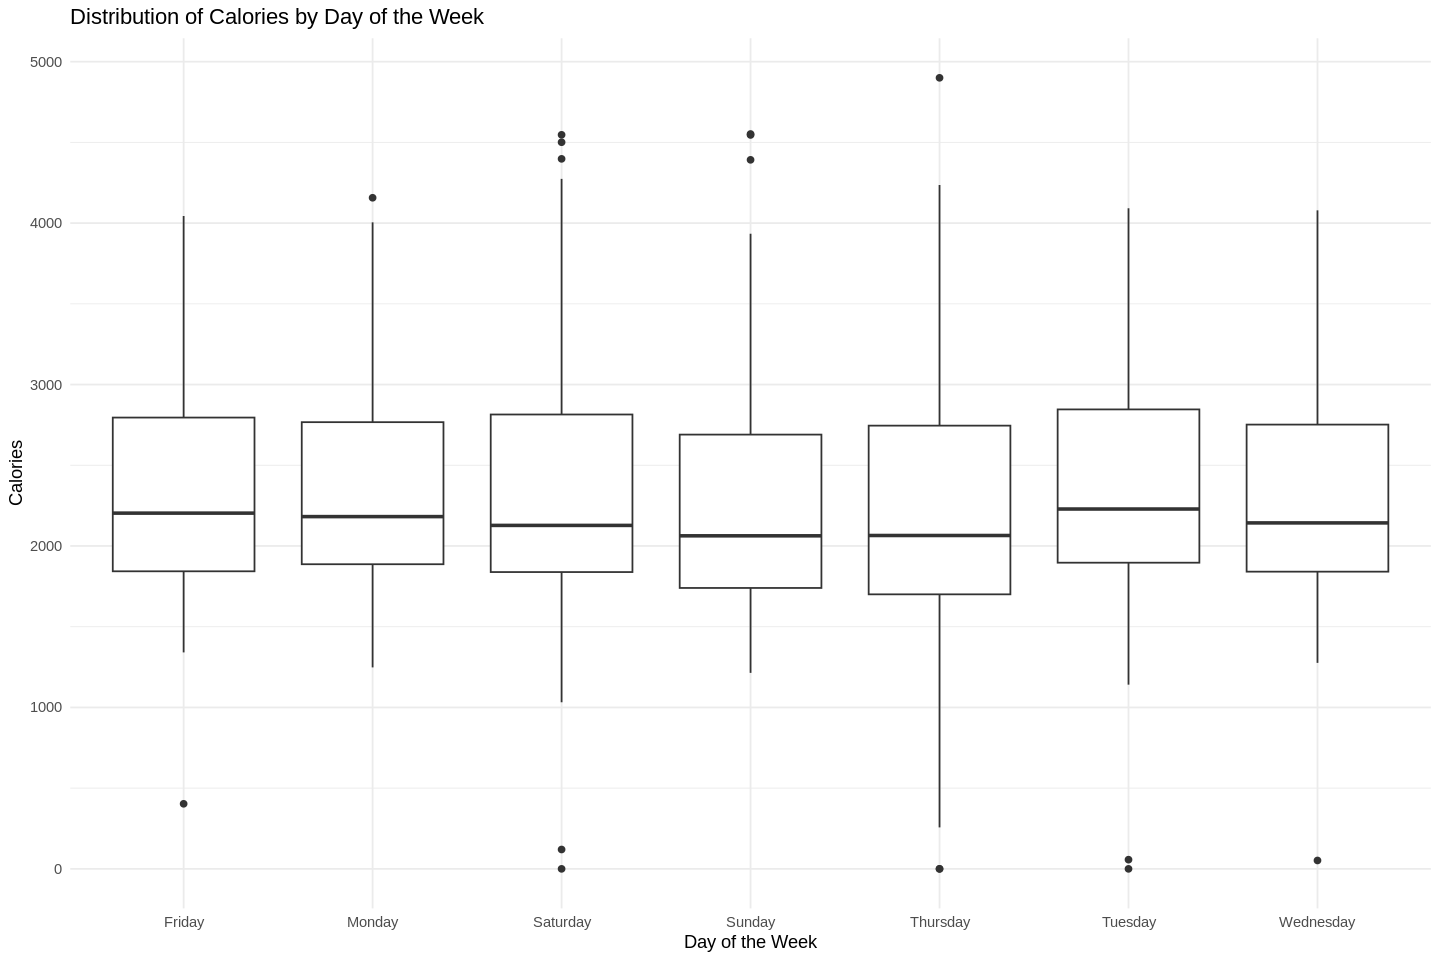

In [16]:
# Load necessary libraries
library(ggplot2)
library(dplyr)

# Convert 'ActivityDate' to datetime format if not already
activity$ActivityDate <- as.Date(activity$ActivityDate)

# Extract the day of the week from 'ActivityDate'
activity$DayOfWeek <- weekdays(activity$ActivityDate)

# Set up the figure and axis
options(repr.plot.width=12, repr.plot.height=8)

# Create a box plot to visualize the distribution of Calories by day of the week
ggplot(activity, aes(x = factor(DayOfWeek, ordered = FALSE), y = Calories)) +
  geom_boxplot() +
  labs(title = 'Distribution of Calories by Day of the Week', x = 'Day of the Week', y = 'Calories') +
  theme_minimal()

We have more average Calories (burned) be day of the week with some distinct outliers.

Let's see the distribution of activity types per week of the period:

In [18]:
# Check the current format of the date column
if ("ActivityDate" %in% colnames(activity)) {
  print(head(activity$ActivityDate))
}

# Convert 'ActivityDate' to datetime format if not already
if ("ActivityDate" %in% colnames(activity)) {
  activity$ActivityDate <- as.POSIXct(activity$ActivityDate, format="%Y-%m-%d", tz="UTC")
}

# Set 'ActivityDate' as the index for aggregation
if ("ActivityDate" %in% colnames(activity)) {
  activity <- activity %>% arrange(ActivityDate) %>% mutate(rownum = row_number())
  activity <- activity %>% arrange(rownum) %>% select(-rownum)
}

# Resample the data on a weekly basis and sum the values
weekly_activity_data <- activity %>%
  group_by(week = lubridate::floor_date(ActivityDate, unit = "week")) %>%
  summarise_at(vars(c('VeryActiveMinutes', 'FairlyActiveMinutes', 'LightlyActiveMinutes')), sum)

# Set up the figure and axis
options(repr.plot.width=12, repr.plot.height=8)

# Create a stacked bar chart
barplot(t(as.matrix(weekly_activity_data[, c('VeryActiveMinutes', 'FairlyActiveMinutes', 'LightlyActiveMinutes')])),
        beside = TRUE, col = viridis::viridis(3), main = 'Weekly Breakdown of Activity Minutes',
        xlab = 'Week', ylab = 'Minutes', legend.text = colnames(weekly_activity_data[, c('VeryActiveMinutes', 'FairlyActiveMinutes', 'LightlyActiveMinutes')]),
        args.legend = list(title = 'Activity Level'))

[1] "2016-04-12 UTC" "2016-04-12 UTC" "2016-04-12 UTC" "2016-04-12 UTC"
[5] "2016-04-12 UTC" "2016-04-12 UTC"


ERROR: ignored

We can see the dominance of "lighlty active" minutes in the data.

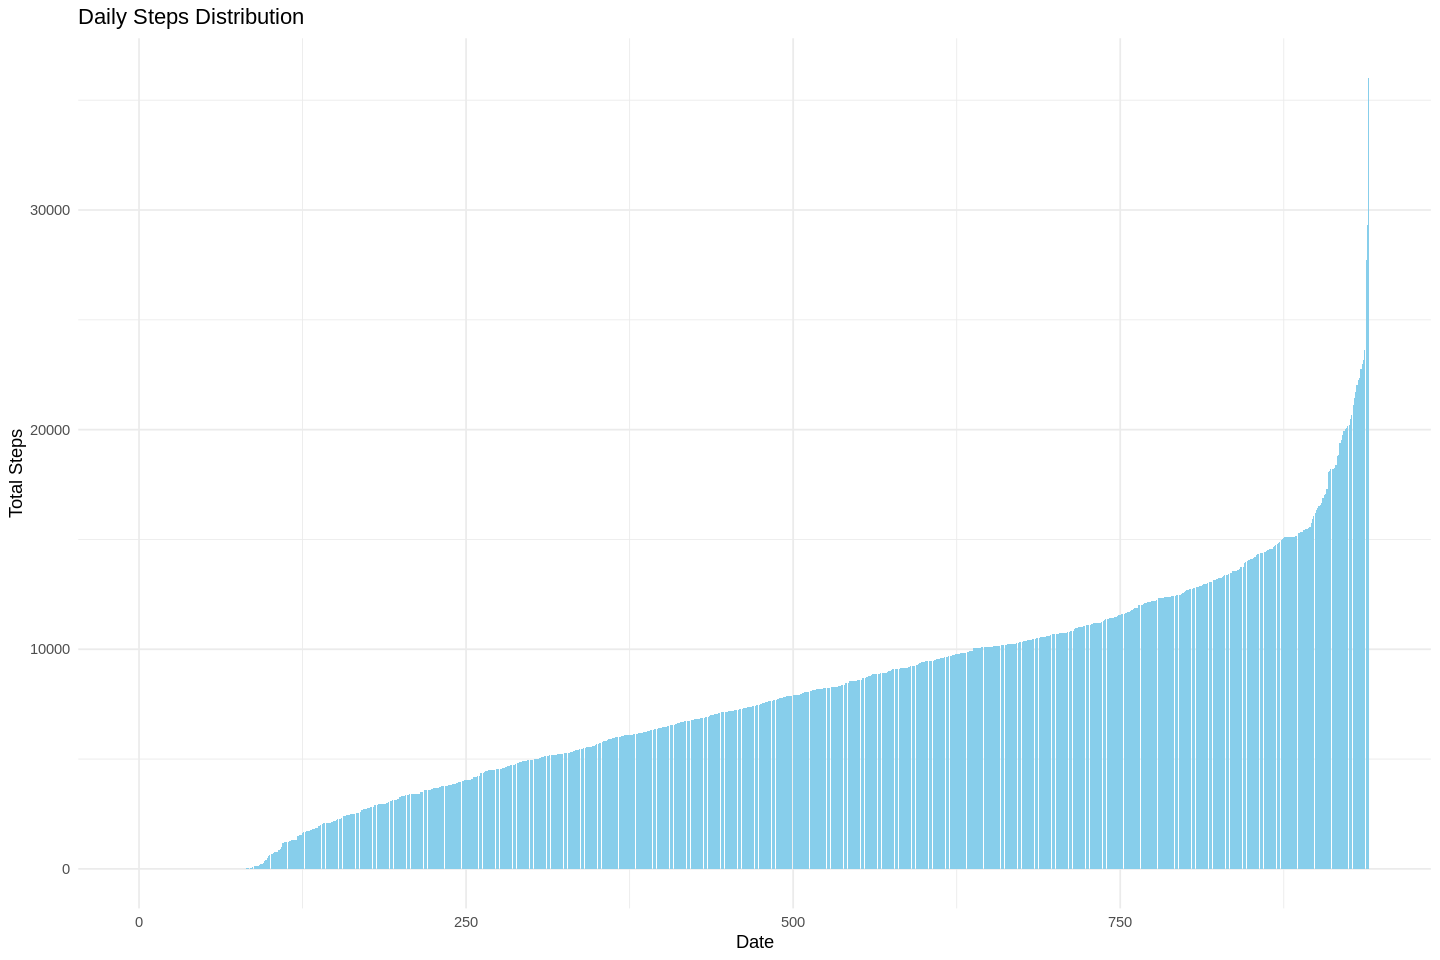

In [20]:
# Load necessary libraries
library(ggplot2)

# Sort the data frame by 'TotalSteps' in ascending order
sorted_activity <- activity[order(activity$TotalSteps), ]

# Set up the figure and axis
options(repr.plot.width=12, repr.plot.height=8)

# Create a bar chart to visualize TotalSteps for each day
ggplot(sorted_activity, aes(x = seq_along(TotalSteps), y = TotalSteps)) +
  geom_bar(stat = "identity", fill = "skyblue") +
  labs(title = 'Daily Steps Distribution', x = 'Date', y = 'Total Steps') +
  theme_minimal()

Here are our most active users for different categories:

In [21]:
# Load necessary libraries
library(dplyr)

# Find the 5 most active IDs based on Calories
most_active_calories <- activity %>%
  group_by(Id) %>%
  summarise(total_calories = sum(Calories)) %>%
  arrange(desc(total_calories)) %>%
  head(5)

# Find the 5 most active IDs based on TotalSteps
most_active_steps <- activity %>%
  group_by(Id) %>%
  summarise(total_steps = sum(TotalSteps)) %>%
  arrange(desc(total_steps)) %>%
  head(5)

# Find the 5 most active IDs based on the sum of VeryActiveMinutes, FairlyActiveMinutes, and LightlyActiveMinutes
most_active_combined <- activity %>%
  group_by(Id) %>%
  summarise(total_active = sum(VeryActiveMinutes + FairlyActiveMinutes + LightlyActiveMinutes)) %>%
  arrange(desc(total_active)) %>%
  head(5)

# Print the results
cat("Top 5 most active IDs based on Calories:\n")
print(most_active_calories)

cat("\nTop 5 most active IDs based on Steps:\n")
print(most_active_steps)

cat("\nTop 5 most active IDs based on Combined Activity:\n")
print(most_active_combined)

Top 5 most active IDs based on Calories:
# A tibble: 5 × 2
          Id total_calories
       <dbl>          <int>
1 8378563200         106534
2 8877689391         106028
3 5577150313         100789
4 4388161847          95910
5 4702921684          91932

Top 5 most active IDs based on Steps:
# A tibble: 5 × 2
          Id total_steps
       <dbl>       <int>
1 8877689391      497241
2 8053475328      457662
3 1503960366      375619
4 2022484408      352490
5 4388161847      335232

Top 5 most active IDs based on Combined Activity:
# A tibble: 5 × 2
          Id total_active
       <dbl>        <int>
1 2873212765        10175
2 2022484408         9706
3 8877689391         9632
4 4558609924         9581
5 6962181067         8901


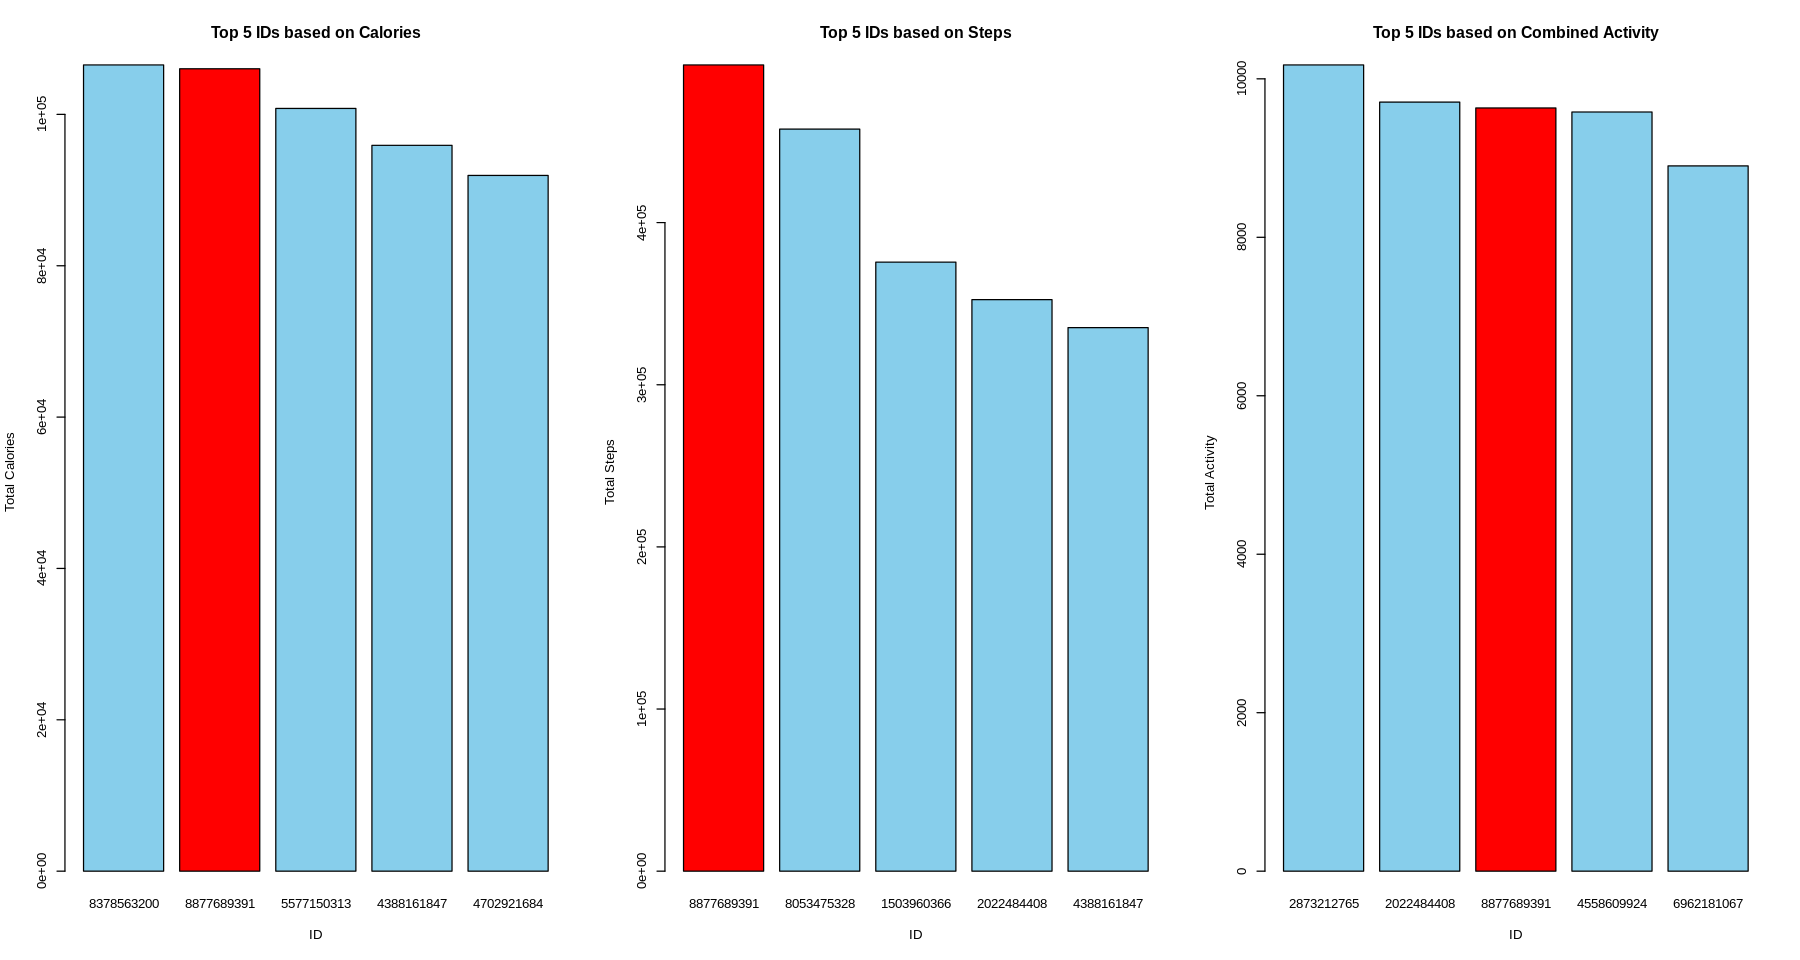

In [22]:
# Load necessary libraries
library(dplyr)
library(ggplot2)

# Find the 5 most active IDs based on Calories
most_active_calories <- activity %>%
  group_by(Id) %>%
  summarise(total_calories = sum(Calories)) %>%
  arrange(desc(total_calories)) %>%
  head(5)

# Find the 5 most active IDs based on TotalSteps
most_active_steps <- activity %>%
  group_by(Id) %>%
  summarise(total_steps = sum(TotalSteps)) %>%
  arrange(desc(total_steps)) %>%
  head(5)

# Find the 5 most active IDs based on the sum of VeryActiveMinutes, FairlyActiveMinutes, and LightlyActiveMinutes
most_active_combined <- activity %>%
  group_by(Id) %>%
  summarise(total_active = sum(VeryActiveMinutes + FairlyActiveMinutes + LightlyActiveMinutes)) %>%
  arrange(desc(total_active)) %>%
  head(5)

# Identify duplicate IDs in the top 5 across categories
duplicate_ids <- intersect(intersect(most_active_calories$Id, most_active_steps$Id), most_active_combined$Id)

# Set up the figure and axis for the bar plots
options(repr.plot.width=15, repr.plot.height=8)
par(mfrow=c(1,3))

# Bar plot for Calories
barplot(height = most_active_calories$total_calories, names.arg = most_active_calories$Id,
        col = ifelse(most_active_calories$Id %in% duplicate_ids, 'red', 'skyblue'),
        main = 'Top 5 IDs based on Calories', xlab = 'ID', ylab = 'Total Calories')

# Bar plot for TotalSteps
barplot(height = most_active_steps$total_steps, names.arg = most_active_steps$Id,
        col = ifelse(most_active_steps$Id %in% duplicate_ids, 'red', 'skyblue'),
        main = 'Top 5 IDs based on Steps', xlab = 'ID', ylab = 'Total Steps')

# Bar plot for Combined Activity
barplot(height = most_active_combined$total_active, names.arg = most_active_combined$Id,
        col = ifelse(most_active_combined$Id %in% duplicate_ids, 'red', 'skyblue'),
        main = 'Top 5 IDs based on Combined Activity', xlab = 'ID', ylab = 'Total Activity')

There is one user that is in the top 5 for all types of activity, most steps, and most calories burned.

Let's see if there is any information to suggest that our biggest sleepers in the data (those with the most logged hours of sleep) also happen to be lazier by nature.

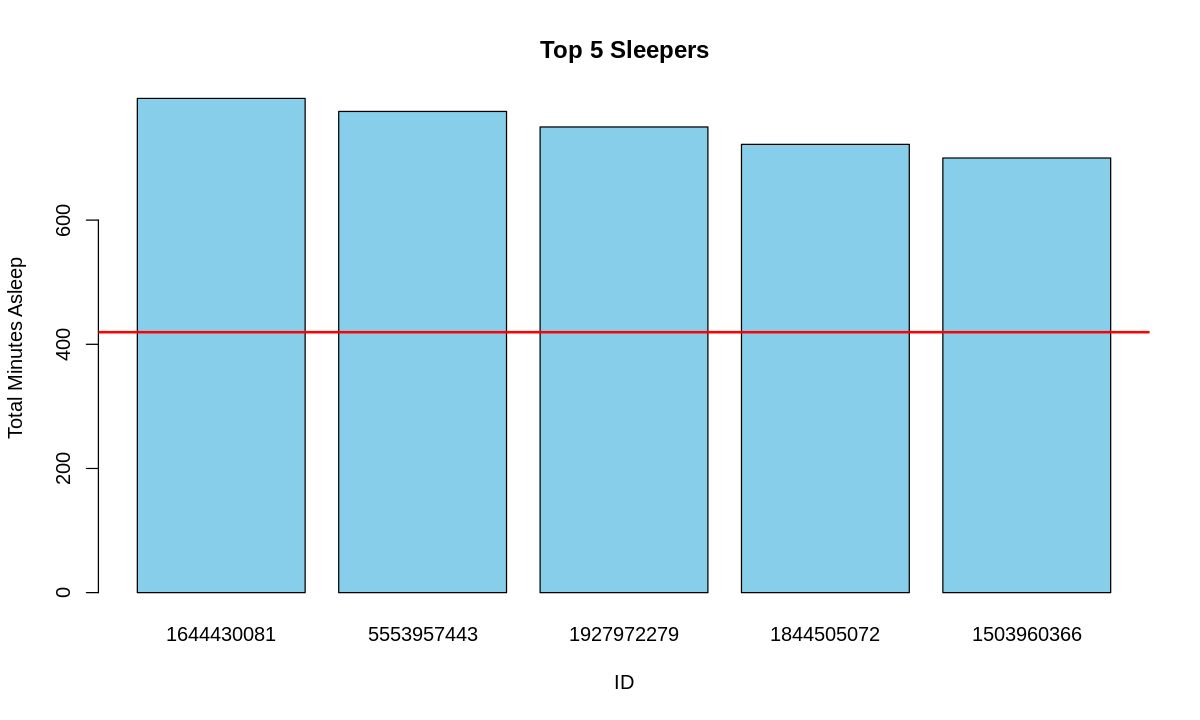

In [23]:
# Find the 5 top sleepers based on TotalMinutesAsleep
top_sleepers <- sleep %>%
  arrange(desc(TotalMinutesAsleep)) %>%
  head(5)

# Set up the figure and axis for the bar plot
options(repr.plot.width=10, repr.plot.height=6)

# Create a bar plot for the top sleepers
barplot(height = top_sleepers$TotalMinutesAsleep, names.arg = top_sleepers$Id,
        col = 'skyblue', main = 'Top 5 Sleepers', xlab = 'ID', ylab = 'Total Minutes Asleep')

# Calculate the average TotalMinutesAsleep for all user IDs
average_sleep <- mean(sleep$TotalMinutesAsleep, na.rm = TRUE)

# Add a horizontal line for the average
abline(h = average_sleep, col = "red", lwd = 2)

In [24]:
# Load necessary libraries
library(dplyr)

# Find the top 5 sleepers based on TotalMinutesAsleep
top_sleepers <- sleep %>%
  arrange(desc(TotalMinutesAsleep)) %>%
  head(5)

# Print the unique IDs from the 'sleep' data frame
cat("Top 5 Sleeper IDs:\n")
print(unique(top_sleepers$Id))


Top 5 Sleeper IDs:
[1] 1644430081 5553957443 1927972279 1844505072 1503960366


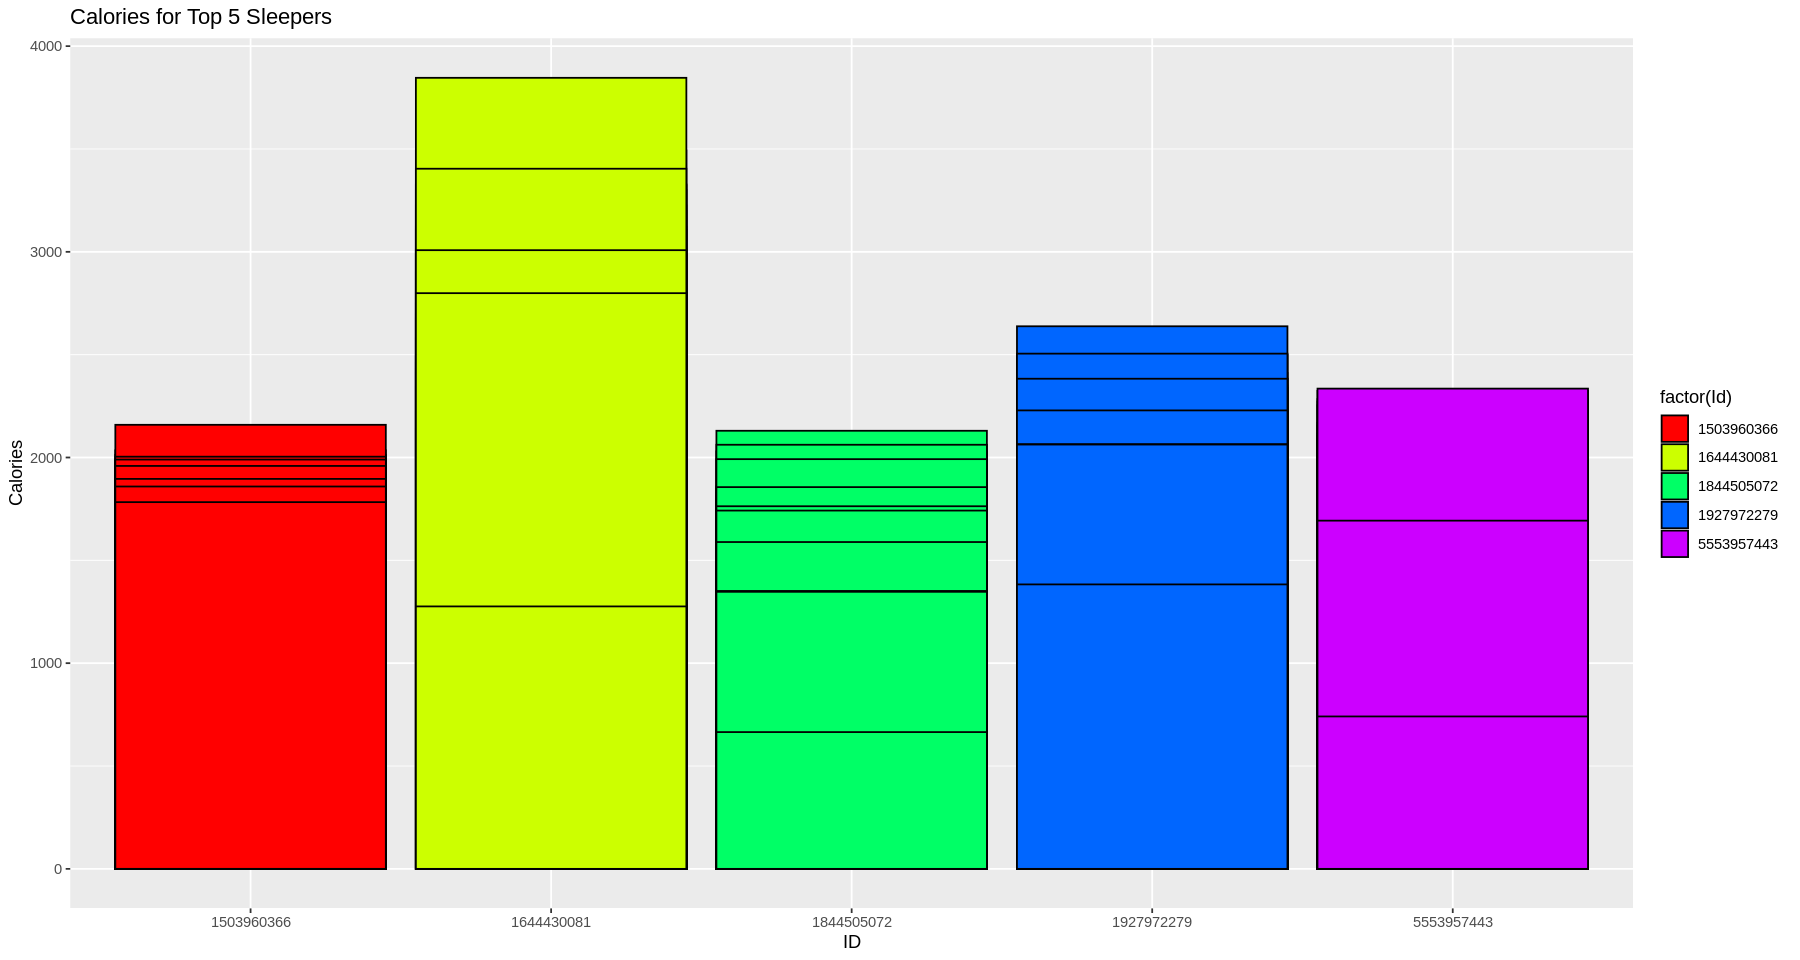

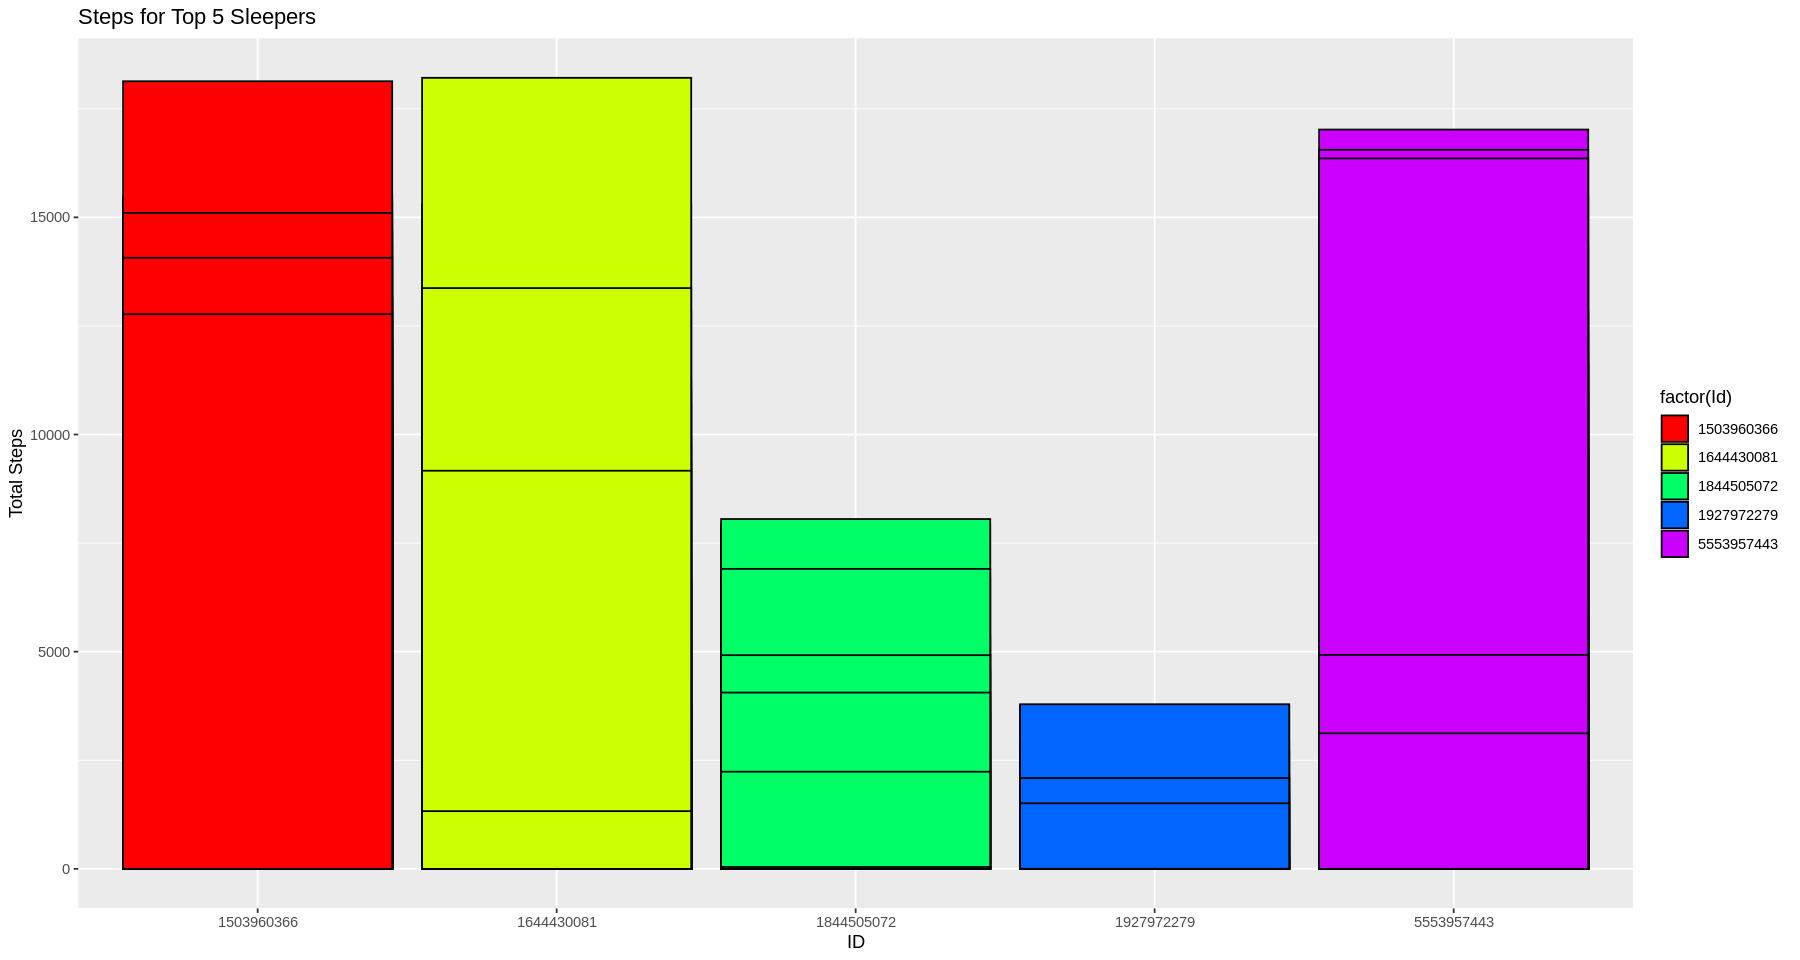

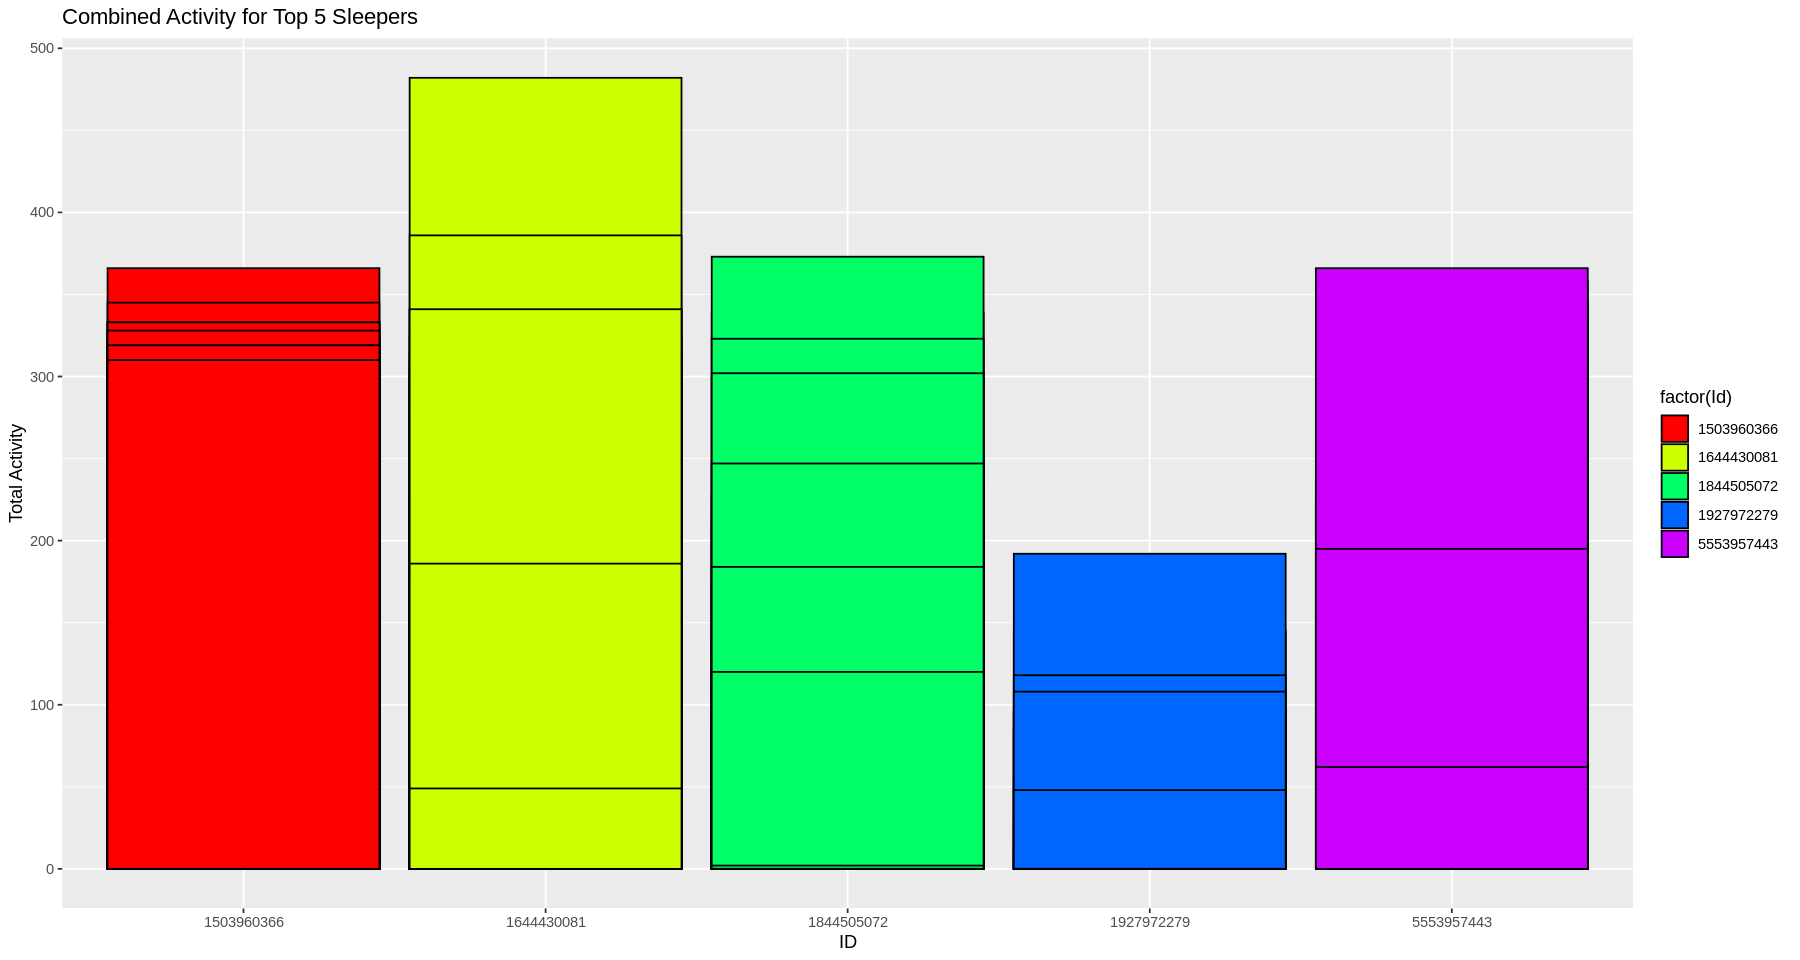

In [25]:
# Load necessary libraries
library(dplyr)
library(ggplot2)

# Specify the top sleeper IDs
top_sleeper_ids <- c(1644430081, 5553957443, 1927972279, 1844505072, 1503960366)

# Filter 'activity' data for the specified IDs
selected_activity <- activity %>%
  filter(Id %in% top_sleeper_ids)

# Set up the figure and axis for the bar plots
options(repr.plot.width=15, repr.plot.height=8)
par(mfrow=c(1,3))

# Bar plot for Calories
ggplot(selected_activity, aes(x = factor(Id), y = Calories, fill = factor(Id))) +
  geom_bar(stat = "identity", position = "dodge", color = "black") +
  labs(title = 'Calories for Top 5 Sleepers', x = 'ID', y = 'Calories') +
  scale_fill_manual(values = rainbow(length(top_sleeper_ids)))

# Bar plot for TotalSteps
ggplot(selected_activity, aes(x = factor(Id), y = TotalSteps, fill = factor(Id))) +
  geom_bar(stat = "identity", position = "dodge", color = "black") +
  labs(title = 'Steps for Top 5 Sleepers', x = 'ID', y = 'Total Steps') +
  scale_fill_manual(values = rainbow(length(top_sleeper_ids)))

# Bar plot for Combined Activity
ggplot(selected_activity, aes(x = factor(Id), y = VeryActiveMinutes + FairlyActiveMinutes + LightlyActiveMinutes, fill = factor(Id))) +
  geom_bar(stat = "identity", position = "dodge", color = "black") +
  labs(title = 'Combined Activity for Top 5 Sleepers', x = 'ID', y = 'Total Activity') +
  scale_fill_manual(values = rainbow(length(top_sleeper_ids)))


The biggest sleepers happen to have very average active information in the data.

How do they compare to the top athletes in the data?

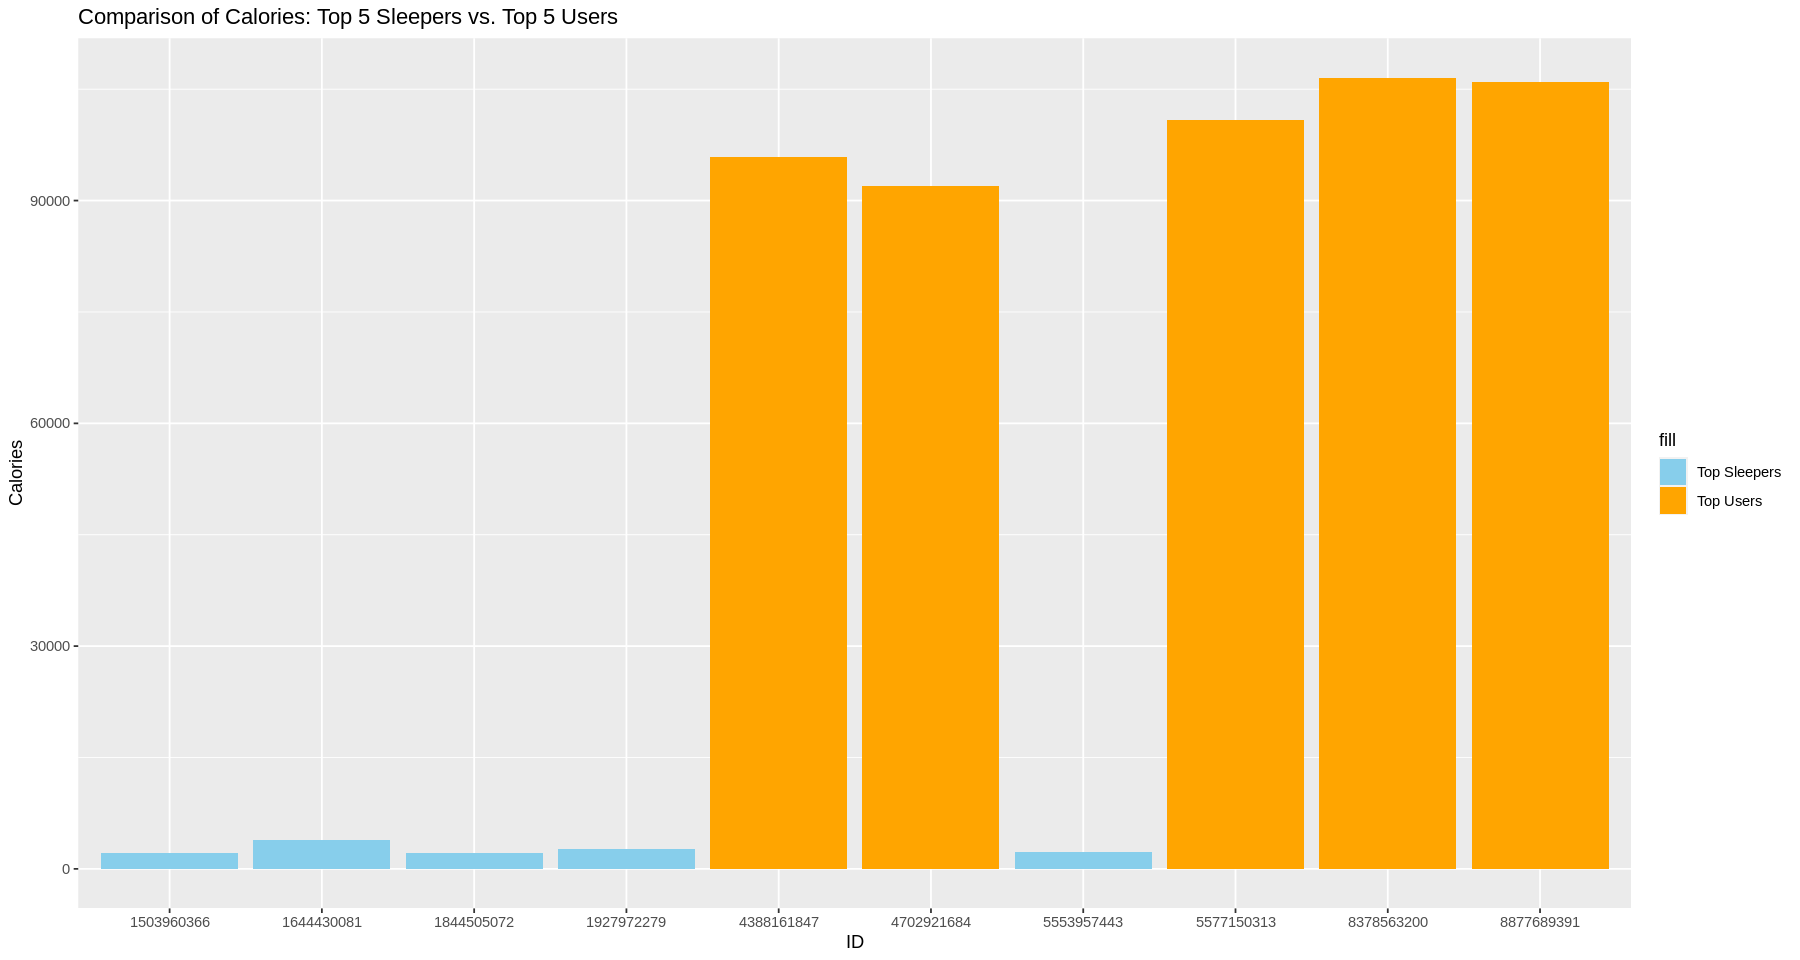

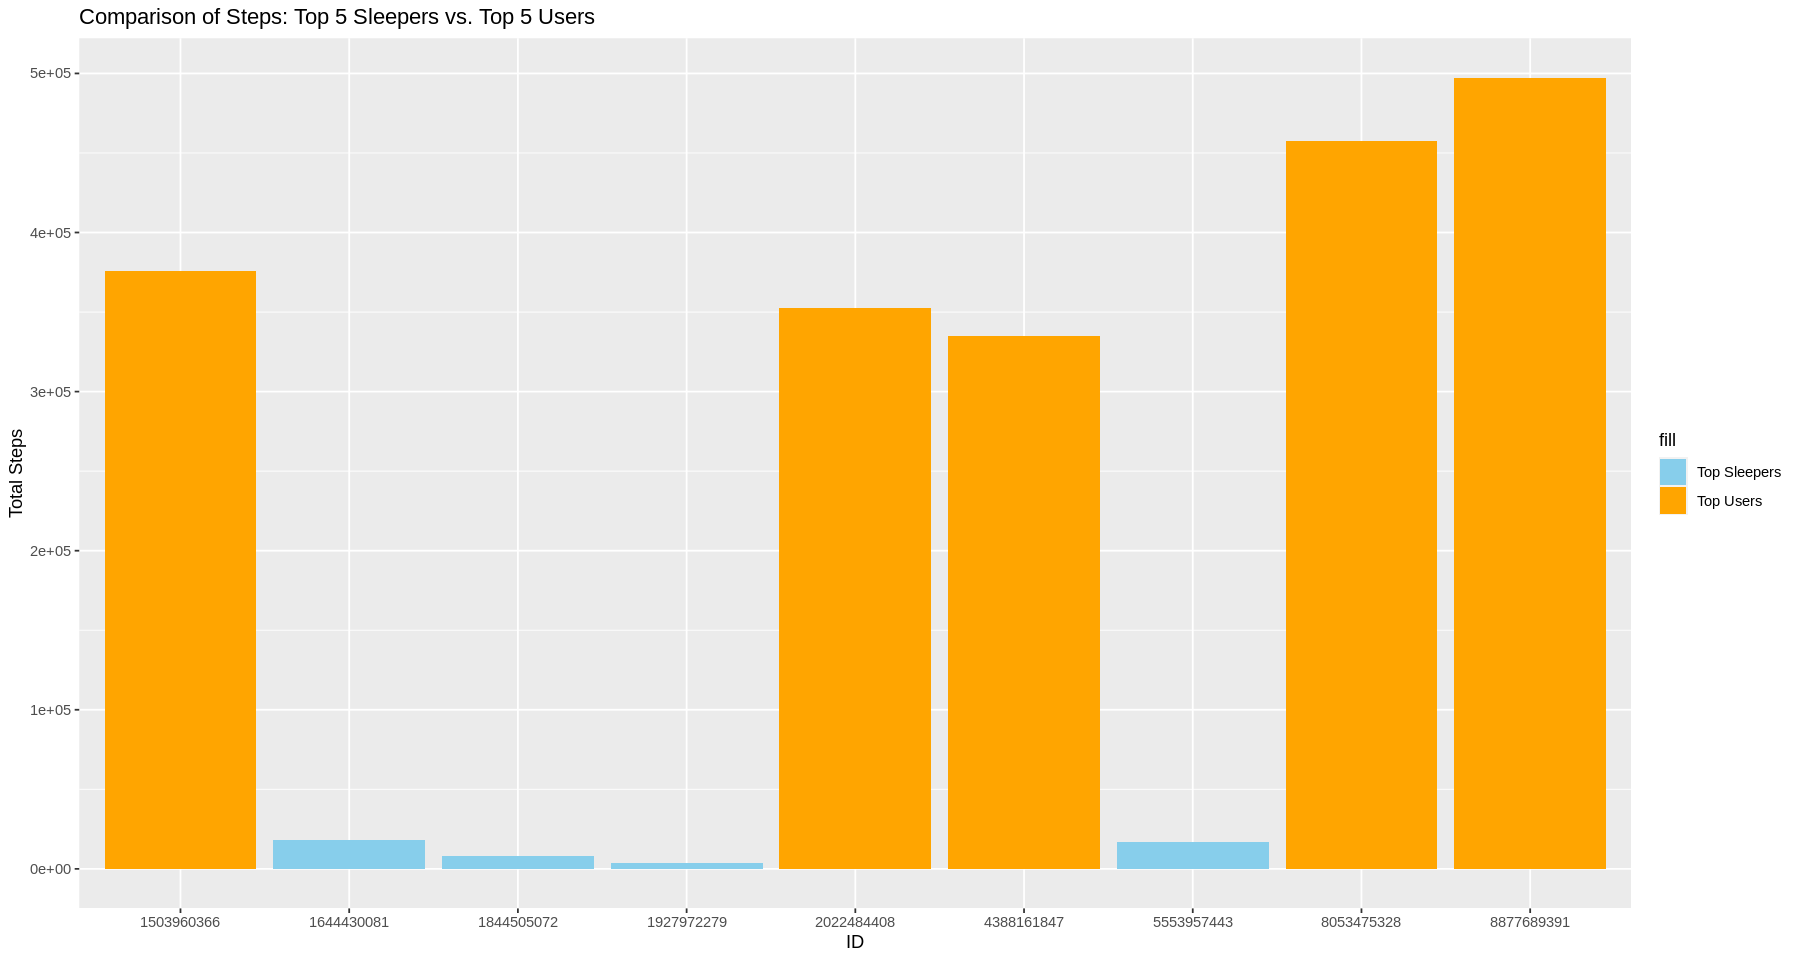

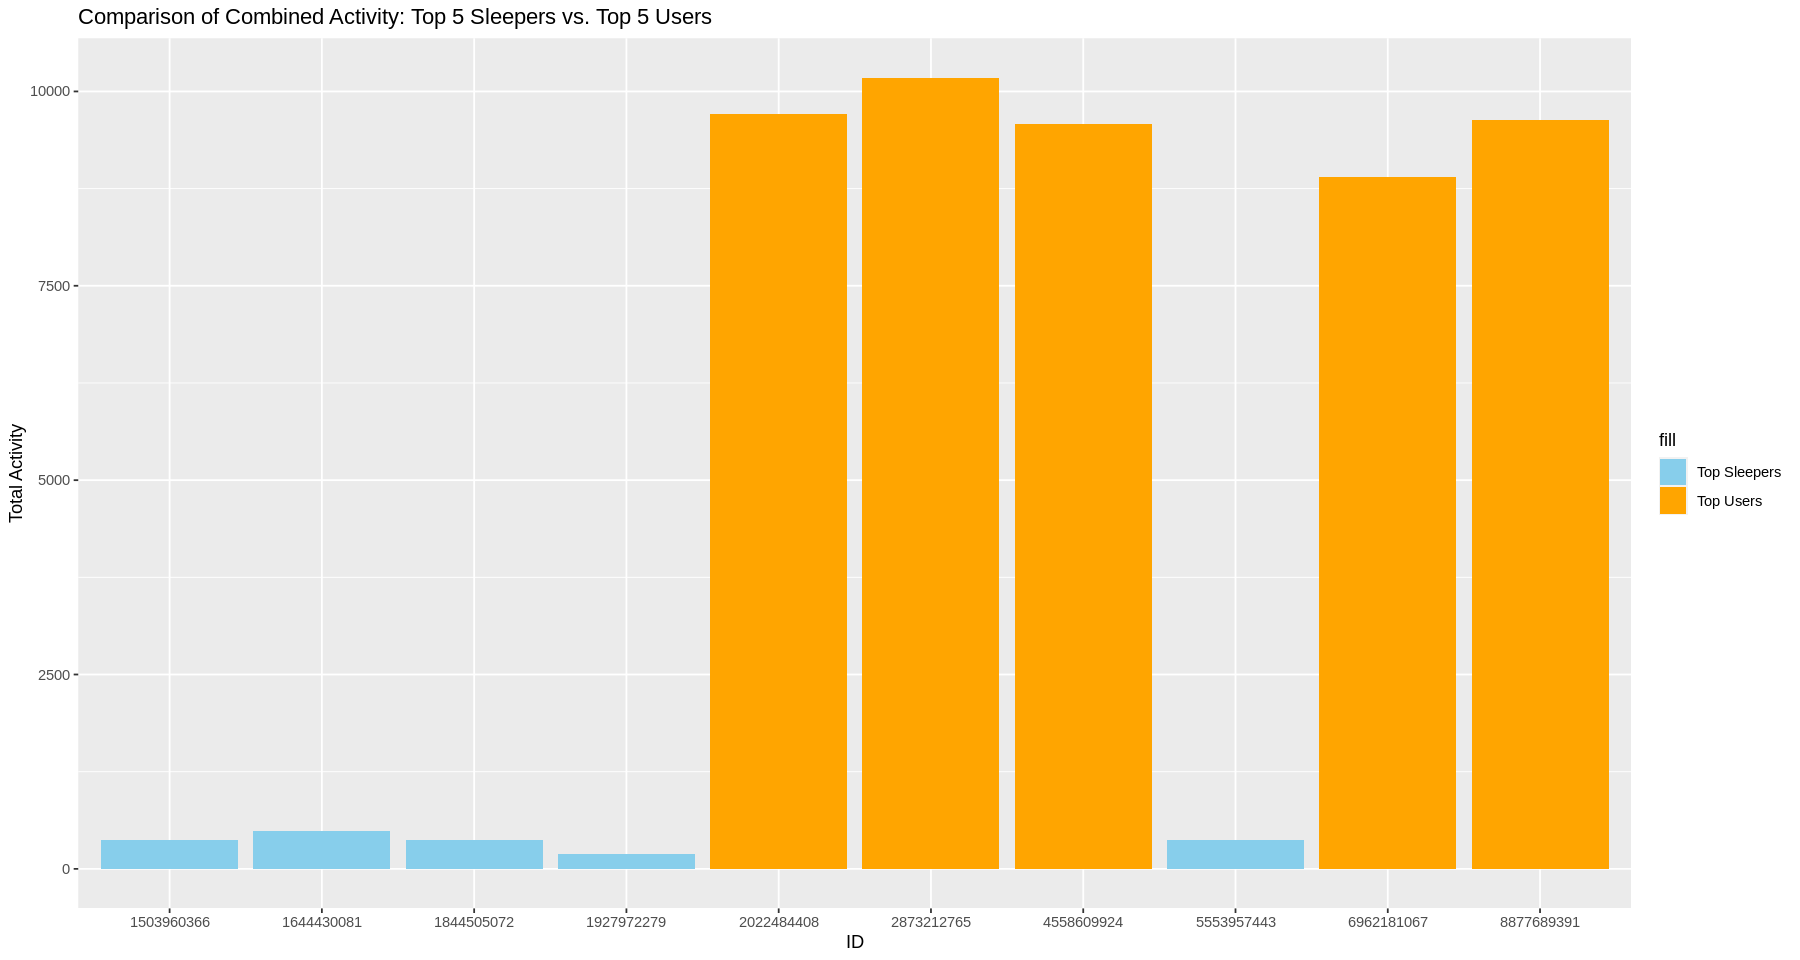

In [26]:
# Load necessary libraries
library(dplyr)
library(ggplot2)

# Top 5 sleeper IDs
top_sleeper_ids <- c(1644430081, 5553957443, 1927972279, 1844505072, 1503960366)

# Filter 'activity' data for the top 5 sleeper IDs
top_sleeper_activity <- activity %>%
  filter(Id %in% top_sleeper_ids)

# Find the top 5 users based on Calories
top_calories_users <- activity %>%
  group_by(Id) %>%
  summarise(total_calories = sum(Calories)) %>%
  arrange(desc(total_calories)) %>%
  head(5)

# Find the top 5 users based on TotalSteps
top_steps_users <- activity %>%
  group_by(Id) %>%
  summarise(total_steps = sum(TotalSteps)) %>%
  arrange(desc(total_steps)) %>%
  head(5)

# Find the top 5 users based on the sum of VeryActiveMinutes, FairlyActiveMinutes, and LightlyActiveMinutes
top_combined_users <- activity %>%
  group_by(Id) %>%
  summarise(total_active = sum(VeryActiveMinutes + FairlyActiveMinutes + LightlyActiveMinutes)) %>%
  arrange(desc(total_active)) %>%
  head(5)

# Set up the figure and axis for the bar plots
options(repr.plot.width=15, repr.plot.height=8)
par(mfrow=c(1,3))

# Bar plot comparing Calories for Top 5 Sleepers vs. Top 5 Users
ggplot() +
  geom_bar(data = top_sleeper_activity, aes(x = factor(Id), y = Calories, fill = 'Top Sleepers'), stat = "identity", position = "dodge") +
  geom_bar(data = top_calories_users, aes(x = factor(Id), y = total_calories, fill = 'Top Users'), stat = "identity", position = "dodge") +
  labs(title = 'Comparison of Calories: Top 5 Sleepers vs. Top 5 Users', x = 'ID', y = 'Calories') +
  scale_fill_manual(values = c('Top Sleepers' = 'skyblue', 'Top Users' = 'orange'))

# Bar plot comparing Steps for Top 5 Sleepers vs. Top 5 Users
ggplot() +
  geom_bar(data = top_sleeper_activity, aes(x = factor(Id), y = TotalSteps, fill = 'Top Sleepers'), stat = "identity", position = "dodge") +
  geom_bar(data = top_steps_users, aes(x = factor(Id), y = total_steps, fill = 'Top Users'), stat = "identity", position = "dodge") +
  labs(title = 'Comparison of Steps: Top 5 Sleepers vs. Top 5 Users', x = 'ID', y = 'Total Steps') +
  scale_fill_manual(values = c('Top Sleepers' = 'skyblue', 'Top Users' = 'orange'))

# Bar plot comparing Combined Activity for Top 5 Sleepers vs. Top 5 Users
ggplot() +
  geom_bar(data = top_sleeper_activity, aes(x = factor(Id), y = VeryActiveMinutes + FairlyActiveMinutes + LightlyActiveMinutes, fill = 'Top Sleepers'), stat = "identity", position = "dodge") +
  geom_bar(data = top_combined_users, aes(x = factor(Id), y = total_active, fill = 'Top Users'), stat = "identity", position = "dodge") +
  labs(title = 'Comparison of Combined Activity: Top 5 Sleepers vs. Top 5 Users', x = 'ID', y = 'Total Activity') +
  scale_fill_manual(values = c('Top Sleepers' = 'skyblue', 'Top Users' = 'orange'))


That looks like a massive difference.

Let's see if the big sleepers fall within the normal range for the mentioned activities:

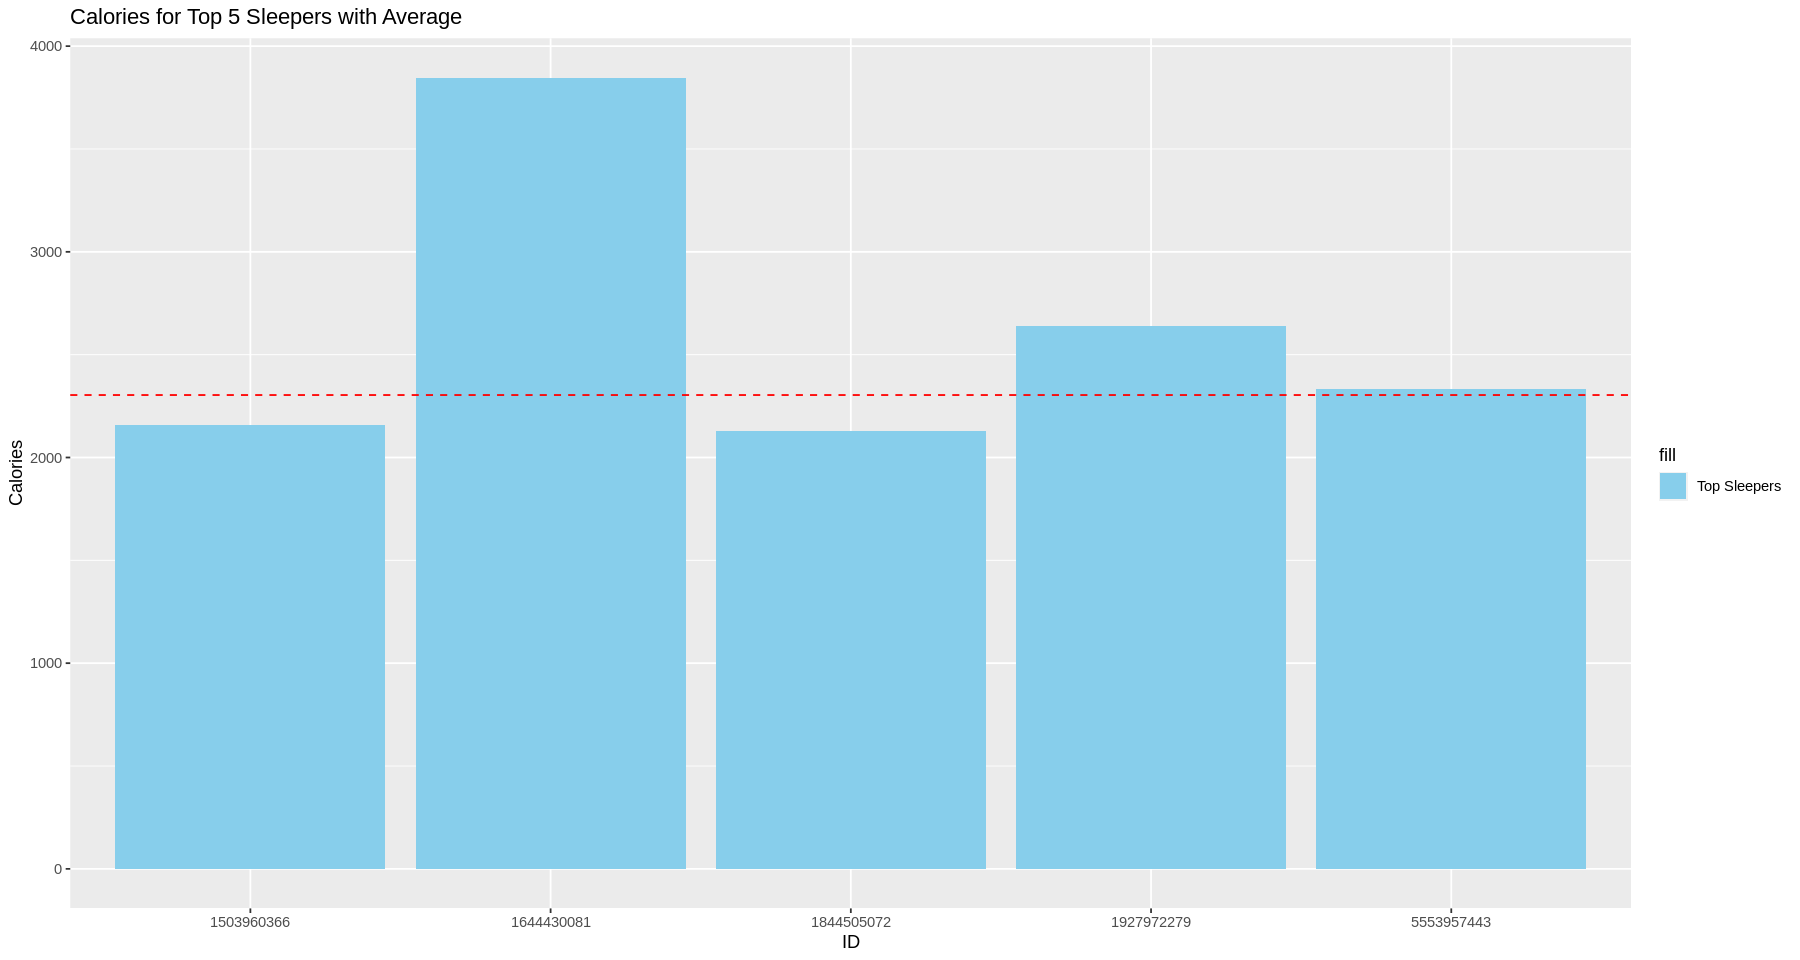

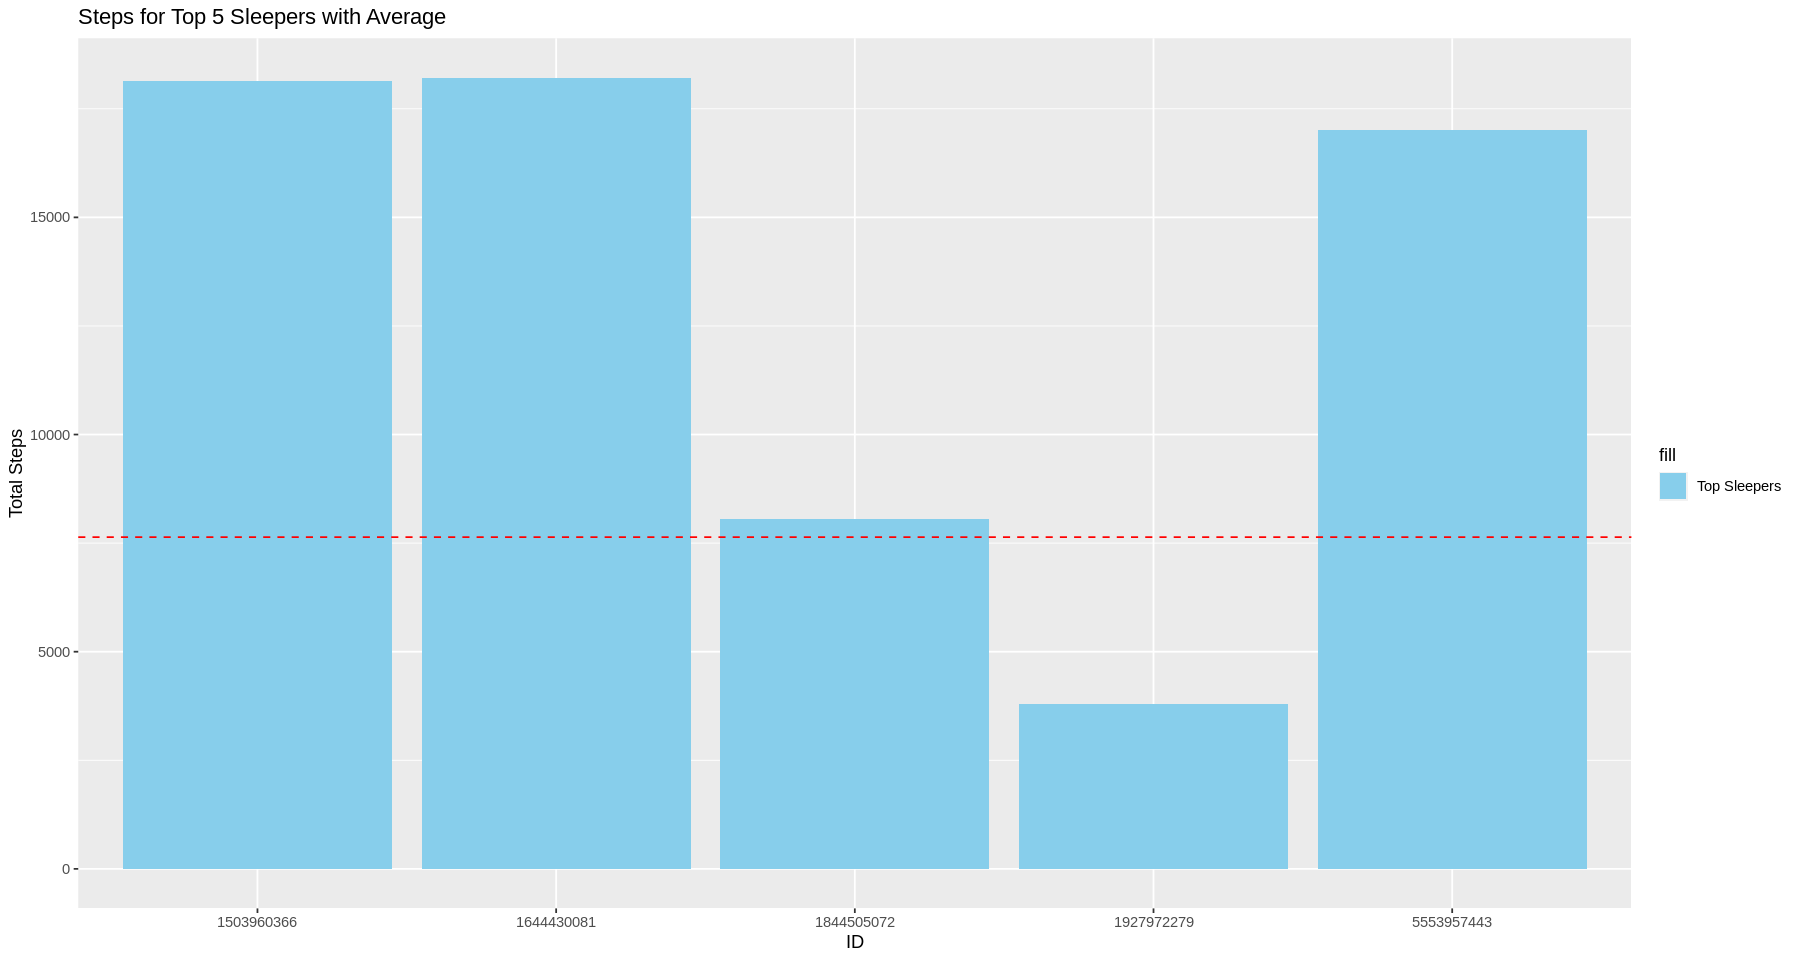

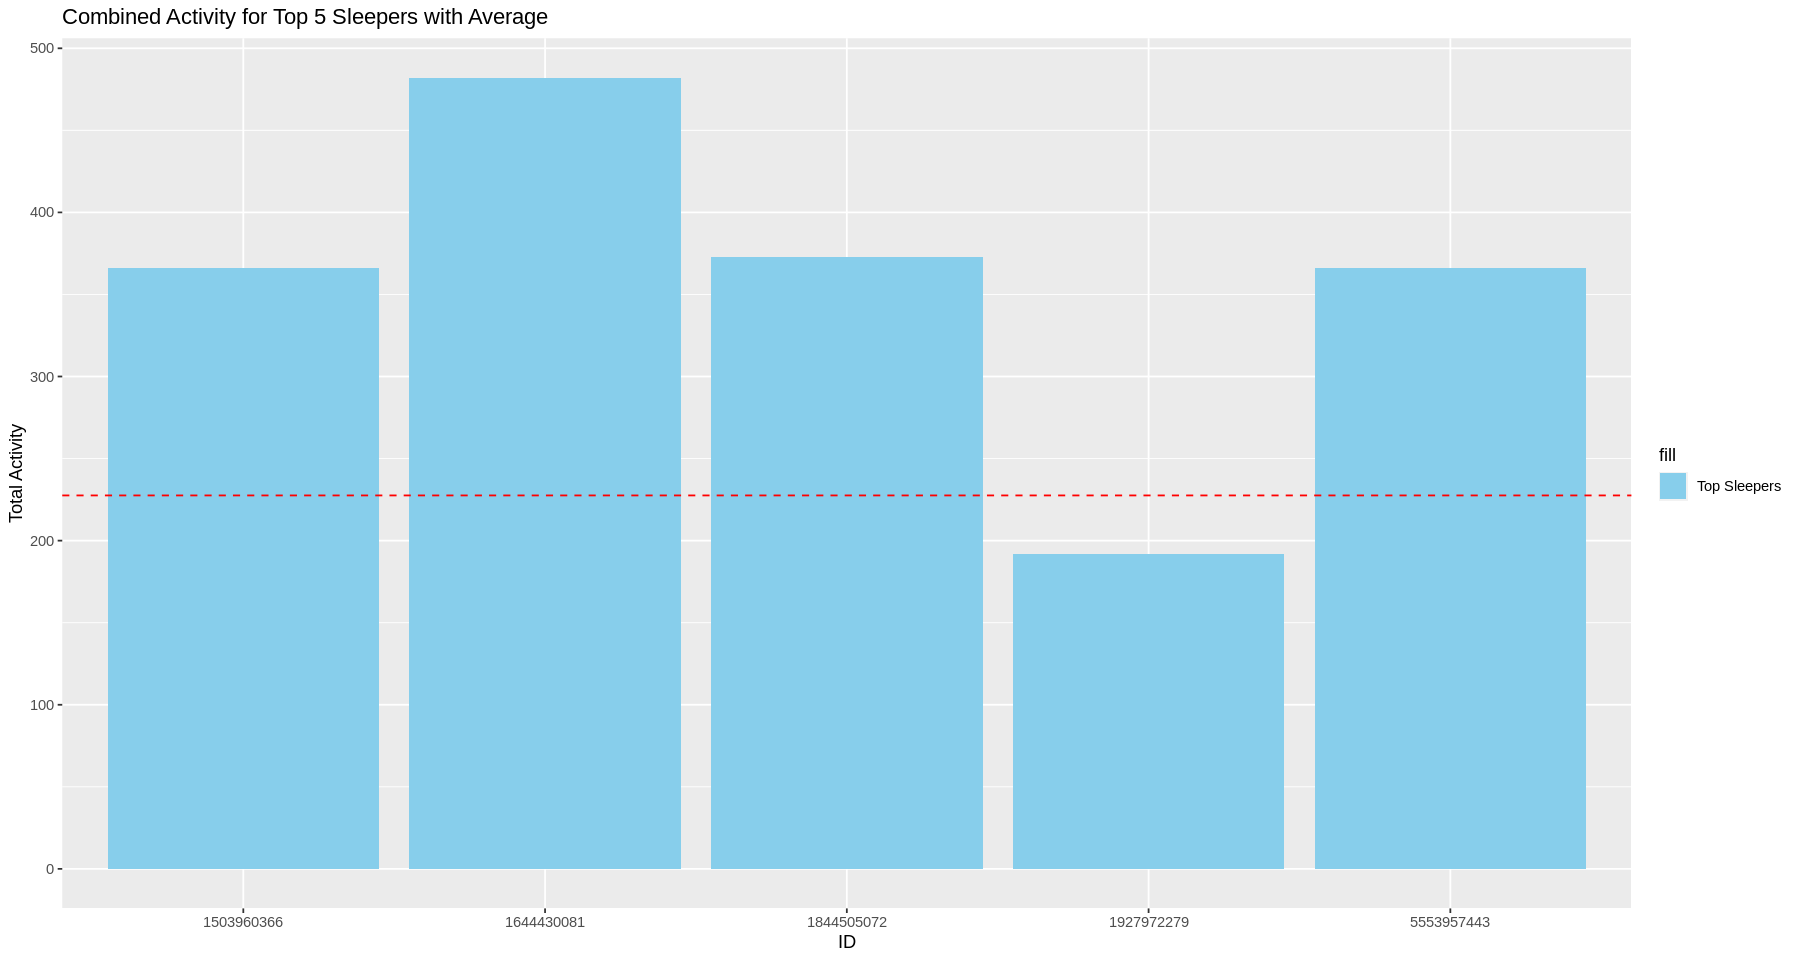

In [27]:
# Load necessary libraries
library(dplyr)
library(ggplot2)

# Top 5 sleeper IDs
top_sleeper_ids <- c(1644430081, 5553957443, 1927972279, 1844505072, 1503960366)

# Filter 'activity' data for the top 5 sleeper IDs
top_sleeper_activity <- activity %>%
  filter(Id %in% top_sleeper_ids)

# Calculate average values for each category
average_values <- activity %>%
  summarise(
    avg_calories = mean(Calories),
    avg_steps = mean(TotalSteps),
    avg_combined_activity = mean(VeryActiveMinutes + FairlyActiveMinutes + LightlyActiveMinutes)
  )

# Set up the figure and axis for the bar plot
options(repr.plot.width=15, repr.plot.height=8)
par(mfrow=c(1,3))

# Bar plot for Calories for Top 5 Sleepers with Average
ggplot() +
  geom_bar(data = top_sleeper_activity, aes(x = factor(Id), y = Calories, fill = 'Top Sleepers'), stat = "identity", position = "dodge") +
  geom_hline(yintercept = average_values$avg_calories, linetype = "dashed", color = "red") +
  labs(title = 'Calories for Top 5 Sleepers with Average', x = 'ID', y = 'Calories') +
  scale_fill_manual(values = 'skyblue')

# Bar plot for Steps for Top 5 Sleepers with Average
ggplot() +
  geom_bar(data = top_sleeper_activity, aes(x = factor(Id), y = TotalSteps, fill = 'Top Sleepers'), stat = "identity", position = "dodge") +
  geom_hline(yintercept = average_values$avg_steps, linetype = "dashed", color = "red") +
  labs(title = 'Steps for Top 5 Sleepers with Average', x = 'ID', y = 'Total Steps') +
  scale_fill_manual(values = 'skyblue')

# Bar plot for Combined Activity for Top 5 Sleepers with Average
ggplot() +
  geom_bar(data = top_sleeper_activity, aes(x = factor(Id), y = VeryActiveMinutes + FairlyActiveMinutes + LightlyActiveMinutes, fill = 'Top Sleepers'), stat = "identity", position = "dodge") +
  geom_hline(yintercept = average_values$avg_combined_activity, linetype = "dashed", color = "red") +
  labs(title = 'Combined Activity for Top 5 Sleepers with Average', x = 'ID', y = 'Total Activity') +
  scale_fill_manual(values = 'skyblue')

That's much better. We can see that, on average, the top sleepers are not any more 'lazy' than the average.

But this raises some questions about the 'sleep' dataset. Do the numbers make sense for total sleep minutes?

In [28]:
# Summary statistics of TotalSleepRecords
summary_stats <- sleep %>%
  summarise(
    Min_Records = min(TotalSleepRecords, na.rm = TRUE),
    Max_Records = max(TotalSleepRecords, na.rm = TRUE),
    Average_Records = mean(TotalSleepRecords, na.rm = TRUE),
    Median_Records = median(TotalSleepRecords, na.rm = TRUE)
  )

# Display summary statistics
print(summary_stats)

# Count of unique values in TotalSleepRecords
unique_counts <- table(sleep$TotalSleepRecords)

# Display count of unique values
print(unique_counts)

  Min_Records Max_Records Average_Records Median_Records
1           1           3        1.118644              1

  1   2   3 
367  43   3 


In [29]:
head(sleep)

,Id,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed,date
,<dbl>,<dttm>,<int>,<int>,<int>,<chr>
1,1503960366,2016-04-12,1,327,346,04/12/16
2,1503960366,2016-04-13,2,384,407,04/13/16
3,1503960366,2016-04-15,1,412,442,04/15/16
4,1503960366,2016-04-16,2,340,367,04/16/16
5,1503960366,2016-04-17,1,700,712,04/17/16
6,1503960366,2016-04-19,1,304,320,04/19/16


In [30]:
# Summary statistics of TotalSleepRecords
summary_stats <- sleep %>%
  summarise(
    Min_Records = min(TotalMinutesAsleep, na.rm = TRUE),
    Max_Records = max(TotalMinutesAsleep, na.rm = TRUE),
    Average_Records = mean(TotalMinutesAsleep, na.rm = TRUE),
    Median_Records = median(TotalMinutesAsleep, na.rm = TRUE)
  )

# Display summary statistics
print(summary_stats)

  Min_Records Max_Records Average_Records Median_Records
1          58         796        419.4673            433


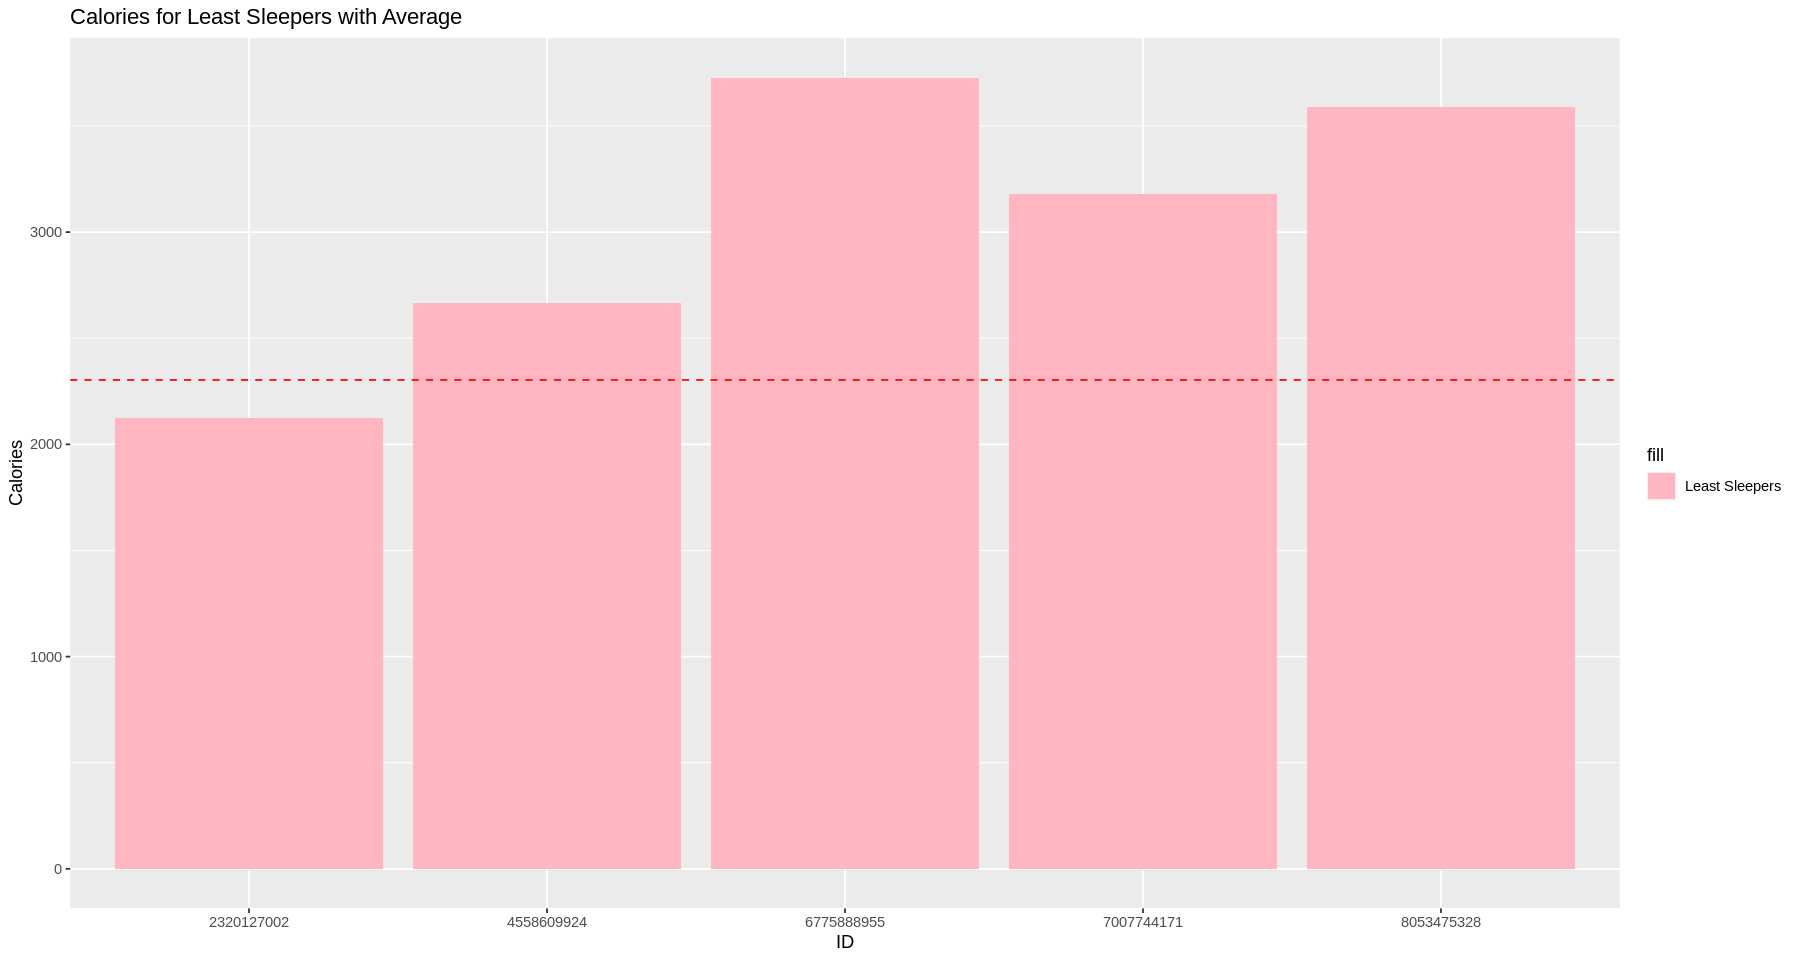

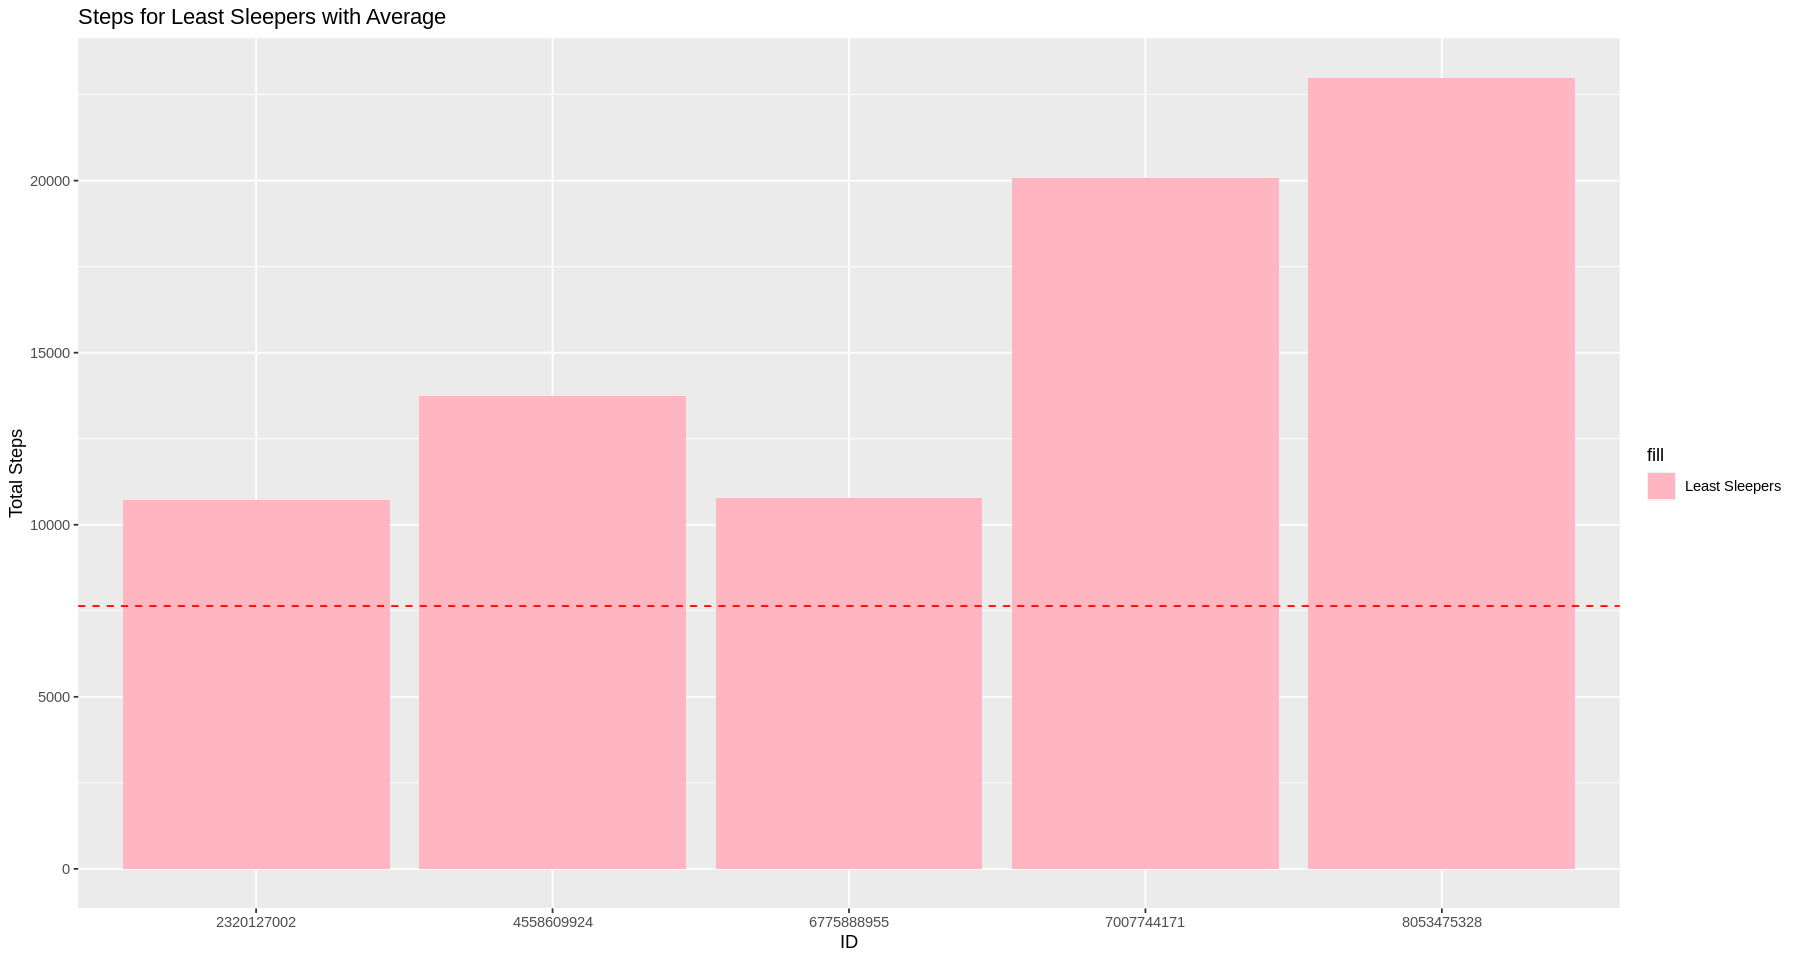

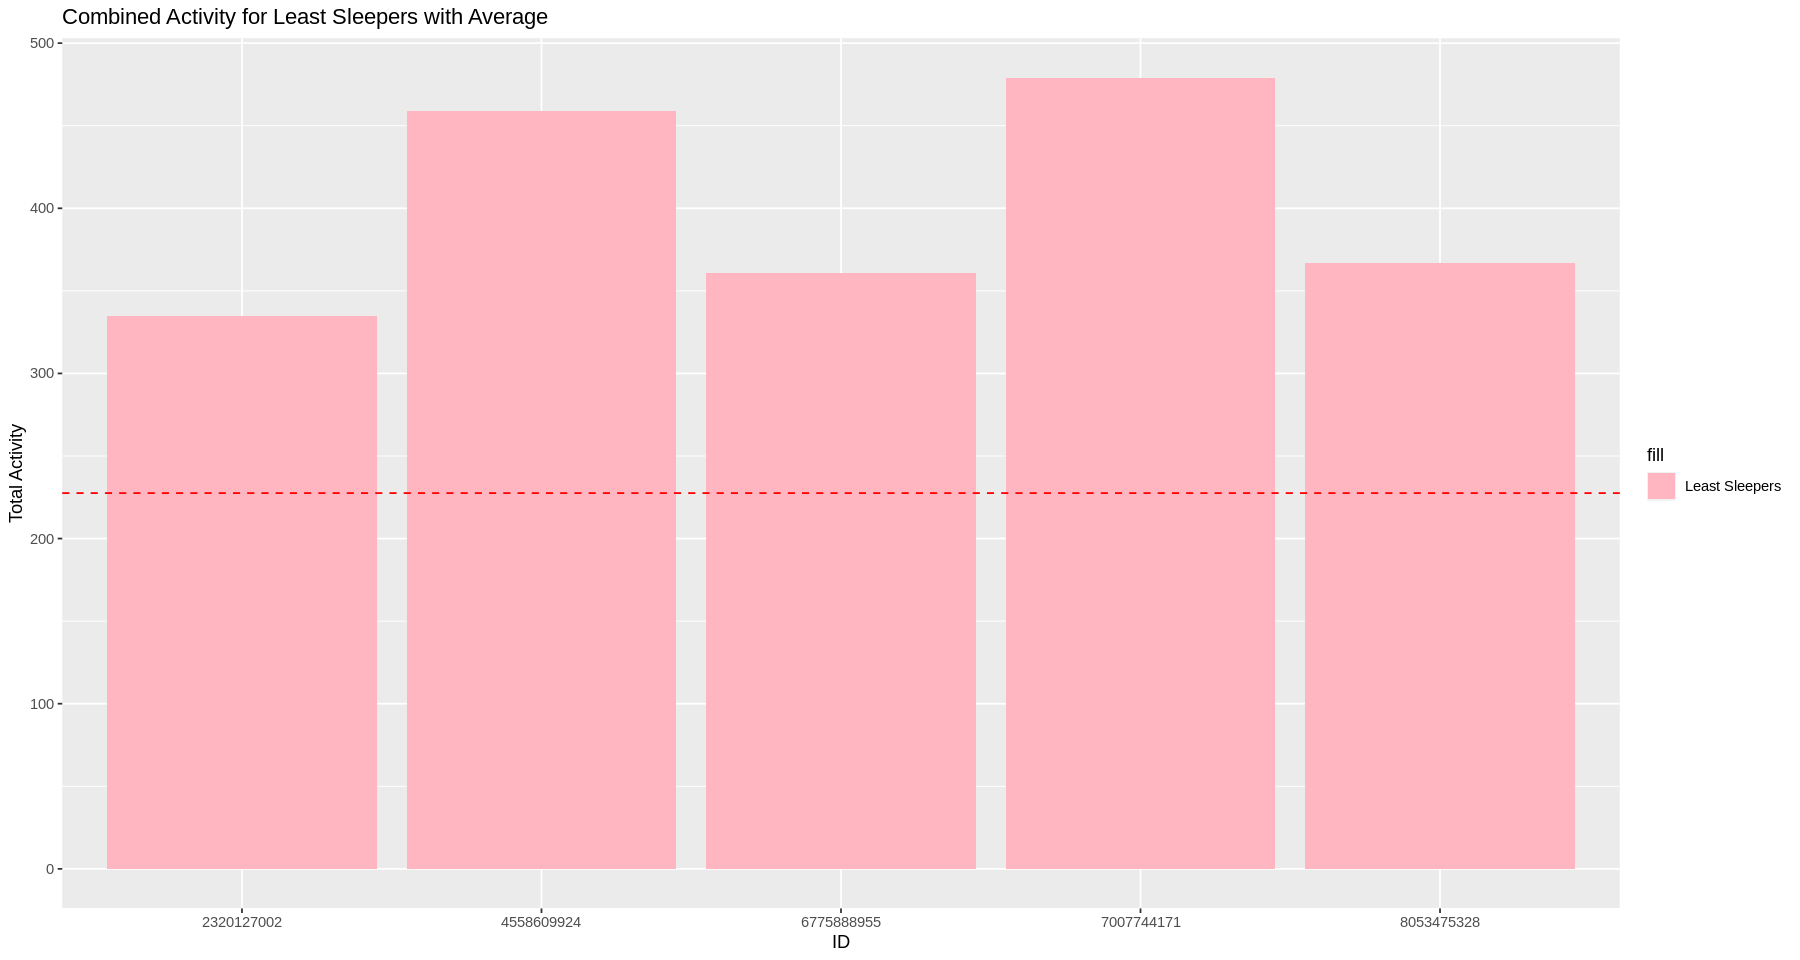

In [31]:
library(dplyr)
library(ggplot2)

# Assuming 'sleep' and 'activity' datasets are already loaded

# Find the 5 users with the least sleep
least_sleepers <- sleep %>%
  group_by(Id) %>%
  summarise(TotalSleep = sum(TotalMinutesAsleep)) %>%
  arrange(TotalSleep) %>%
  head(5) %>%
  pull(Id)

# Filter 'activity' data for the least sleeper IDs
least_sleeper_activity <- activity %>%
  filter(Id %in% least_sleepers)

# Calculate average values for each category
average_values <- activity %>%
  summarise(
    avg_calories = mean(Calories),
    avg_steps = mean(TotalSteps),
    avg_combined_activity = mean(VeryActiveMinutes + FairlyActiveMinutes + LightlyActiveMinutes)
  )

# Set up the figure and axis for the bar plot
options(repr.plot.width=15, repr.plot.height=8)
par(mfrow=c(1,3))

# Bar plot for Calories for Least Sleepers with Average
ggplot(least_sleeper_activity, aes(x = factor(Id), y = Calories, fill = 'Least Sleepers')) +
  geom_bar(stat = "identity", position = "dodge") +
  geom_hline(yintercept = average_values$avg_calories, linetype = "dashed", color = "red") +
  labs(title = 'Calories for Least Sleepers with Average', x = 'ID', y = 'Calories') +
  scale_fill_manual(values = 'lightpink')

# Bar plot for Steps for Least Sleepers with Average
ggplot(least_sleeper_activity, aes(x = factor(Id), y = TotalSteps, fill = 'Least Sleepers')) +
  geom_bar(stat = "identity", position = "dodge") +
  geom_hline(yintercept = average_values$avg_steps, linetype = "dashed", color = "red") +
  labs(title = 'Steps for Least Sleepers with Average', x = 'ID', y = 'Total Steps') +
  scale_fill_manual(values = 'lightpink')

# Bar plot for Combined Activity for Least Sleepers with Average
ggplot(least_sleeper_activity, aes(x = factor(Id), y = VeryActiveMinutes + FairlyActiveMinutes + LightlyActiveMinutes, fill = 'Least Sleepers')) +
  geom_bar(stat = "identity", position = "dodge") +
  geom_hline(yintercept = average_values$avg_combined_activity, linetype = "dashed", color = "red") +
  labs(title = 'Combined Activity for Least Sleepers with Average', x = 'ID', y = 'Total Activity') +
  scale_fill_manual(values = 'lightpink')


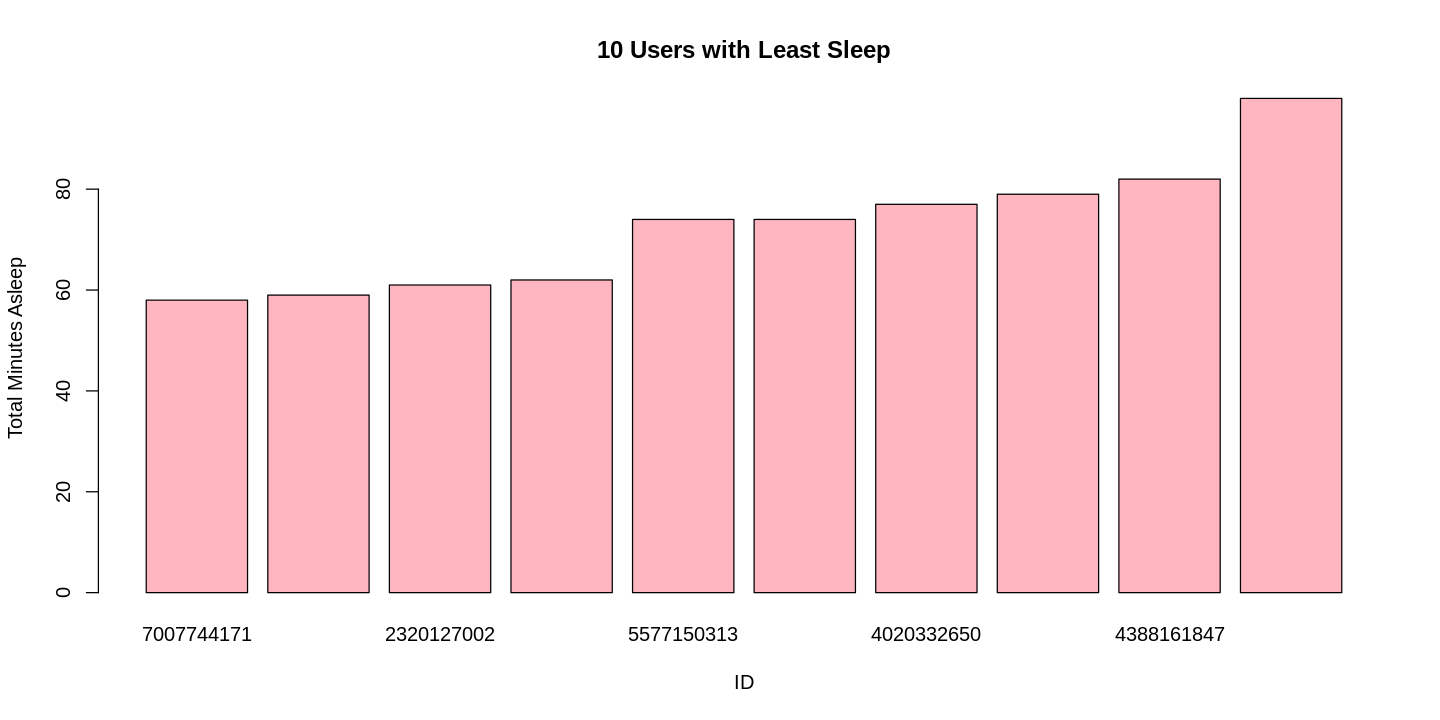

In [32]:
library(dplyr)

# Find the 10 users with the least amount of recorded sleep
least_sleepers <- sleep %>%
  arrange(TotalMinutesAsleep) %>%
  head(10)

# Set up the figure and axis for the bar plot
options(repr.plot.width=12, repr.plot.height=6)

# Create a bar plot for the least sleepers
barplot(height = least_sleepers$TotalMinutesAsleep, names.arg = least_sleepers$Id,
        col = 'lightpink', main = '10 Users with Least Sleep', xlab = 'ID', ylab = 'Total Minutes Asleep')

# Calculate the average TotalMinutesAsleep for all user IDs
average_sleep <- mean(sleep$TotalMinutesAsleep, na.rm = TRUE)

# Add a horizontal line for the average
abline(h = average_sleep, col = "red", lwd = 2)

So despite there being some interesting information regarding sleep patterns, we can see that it doesn't make sense that for the total period, the average total sleep time was 400 minutes. This data won't make it into our final presentation since it is incomplete or missing. We may posit that users were not regularly recording their sleep.

In [33]:
head(intensities)

,Id,ActivityHour,TotalIntensity,AverageIntensity,time,date
,<dbl>,<dttm>,<int>,<dbl>,<chr>,<chr>
1,1503960366,2016-04-12 00:00:00,20,0.333333,00:00:00,04/12/16
2,1503960366,2016-04-12 01:00:00,8,0.133333,01:00:00,04/12/16
3,1503960366,2016-04-12 02:00:00,7,0.116667,02:00:00,04/12/16
4,1503960366,2016-04-12 03:00:00,0,0.000000,03:00:00,04/12/16
5,1503960366,2016-04-12 04:00:00,0,0.000000,04:00:00,04/12/16
6,1503960366,2016-04-12 05:00:00,0,0.000000,05:00:00,04/12/16


In [34]:
library(dplyr)

# Basic summary statistics for TotalIntensity
basic_summary <- intensities %>%
  summarise(
    Mean_Intensity = mean(TotalIntensity, na.rm = TRUE),
    Median_Intensity = median(TotalIntensity, na.rm = TRUE),
    Min_Intensity = min(TotalIntensity, na.rm = TRUE),
    Max_Intensity = max(TotalIntensity, na.rm = TRUE),
    SD_Intensity = sd(TotalIntensity, na.rm = TRUE)
  )

# Display basic summary statistics
print(basic_summary)

# Grouped summary by Id
grouped_summary <- intensities %>%
  group_by(Id) %>%
  summarise(
    Mean_Intensity = mean(TotalIntensity, na.rm = TRUE),
    Median_Intensity = median(TotalIntensity, na.rm = TRUE),
    Min_Intensity = min(TotalIntensity, na.rm = TRUE),
    Max_Intensity = max(TotalIntensity, na.rm = TRUE),
    SD_Intensity = sd(TotalIntensity, na.rm = TRUE)
  )

# Display grouped summary by Id
print(grouped_summary)

# Time-based analysis (if ActivityHour is an hour of the day)
time_based_summary <- intensities %>%
  mutate(ActivityHour = lubridate::hour(lubridate::ymd_hms(ActivityHour))) %>%
  group_by(ActivityHour) %>%
  summarise(
    Average_Intensity = mean(TotalIntensity, na.rm = TRUE)
  )

# Display time-based analysis
print(time_based_summary)

  Mean_Intensity Median_Intensity Min_Intensity Max_Intensity SD_Intensity
1       12.03534                3             0           180     21.13311
# A tibble: 33 × 6
           Id Mean_Intensity Median_Intensity Min_Intensity Max_Intensity
        <dbl>          <dbl>            <dbl>         <int>         <int>
 1 1503960366          16.2               9               0           159
 2 1624580081           8.04              3               0           169
 3 1644430081          10.5               3               0           130
 4 1844505072           5.02              0               0            67
 5 1927972279           1.86              0               0            63
 6 2022484408          17.0               5.5             0           157
 7 2026352035          10.8               8               0            56
 8 2320127002           8.74              2               0            67
 9 2347167796          14.5               8.5             0           132
10 2873212765    

Warning message:
“There was 1 warning in `mutate()`.
ℹ In argument: `ActivityHour =
  lubridate::hour(lubridate::ymd_hms(ActivityHour))`.
Caused by warning:
!  934 failed to parse.”


# A tibble: 24 × 2
   ActivityHour Average_Intensity
          <int>             <dbl>
 1            1             1.42 
 2            2             1.04 
 3            3             0.444
 4            4             0.633
 5            5             4.95 
 6            6             7.77 
 7            7            10.7  
 8            8            14.7  
 9            9            15.4  
10           10            17.6  
# ℹ 14 more rows


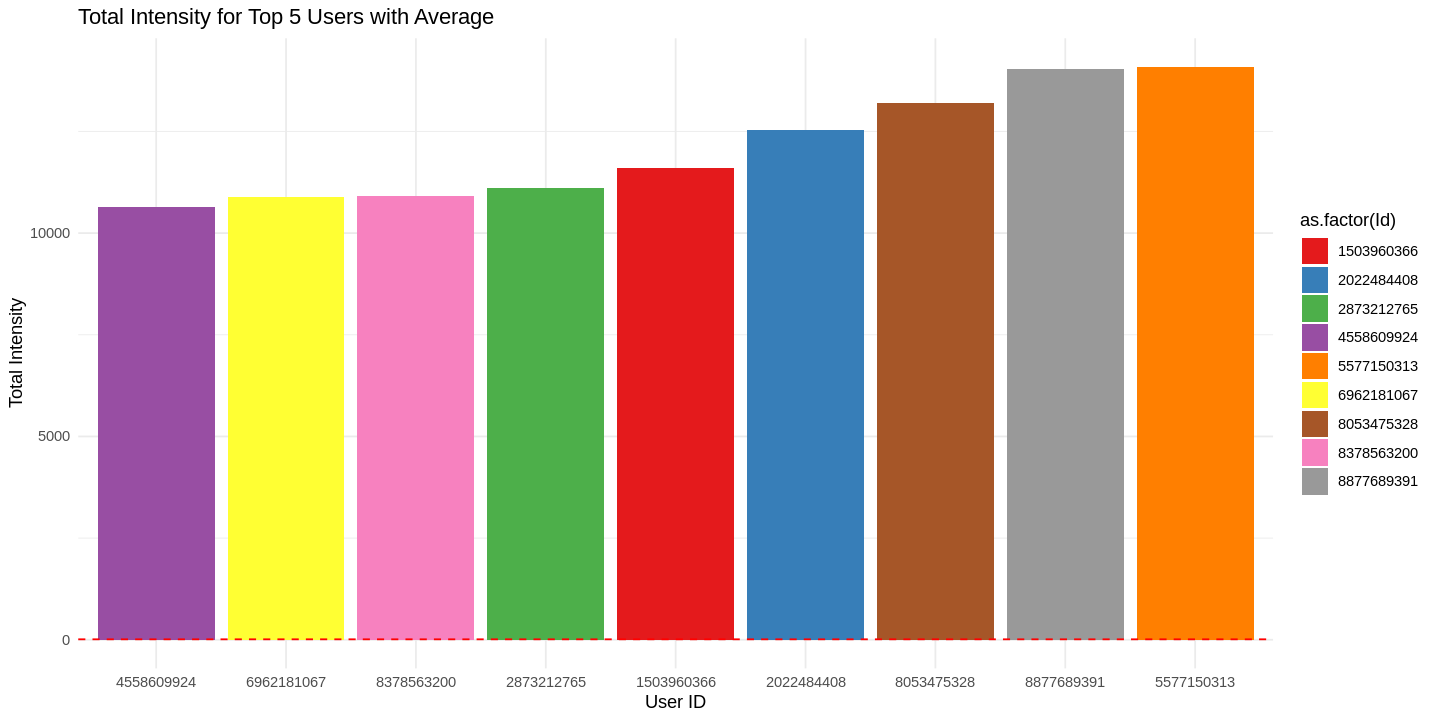

In [35]:
library(dplyr)
library(ggplot2)

# Summing TotalIntensity for each user
user_intensities <- intensities %>%
  group_by(Id) %>%
  summarise(TotalIntensity = sum(TotalIntensity, na.rm = TRUE)) %>%
  arrange(desc(TotalIntensity))

# Identifying the top 5 users
top_users <- head(user_intensities, 9)

# Calculating the average TotalIntensity across all users
average_intensity <- mean(intensities$TotalIntensity, na.rm = TRUE)

# Creating the graph
ggplot(top_users, aes(x = reorder(Id, TotalIntensity), y = TotalIntensity, fill = as.factor(Id))) +
  geom_bar(stat = "identity") +
  geom_hline(yintercept = average_intensity, linetype = "dashed", color = "red") +
  labs(title = "Total Intensity for Top 5 Users with Average", x = "User ID", y = "Total Intensity") +
  theme_minimal() +
  scale_fill_brewer(palette = "Set1")  # You can choose a different palette if desired

# Display the plot
ggsave("Top5IntensityPlot.png", width = 10, height = 6)

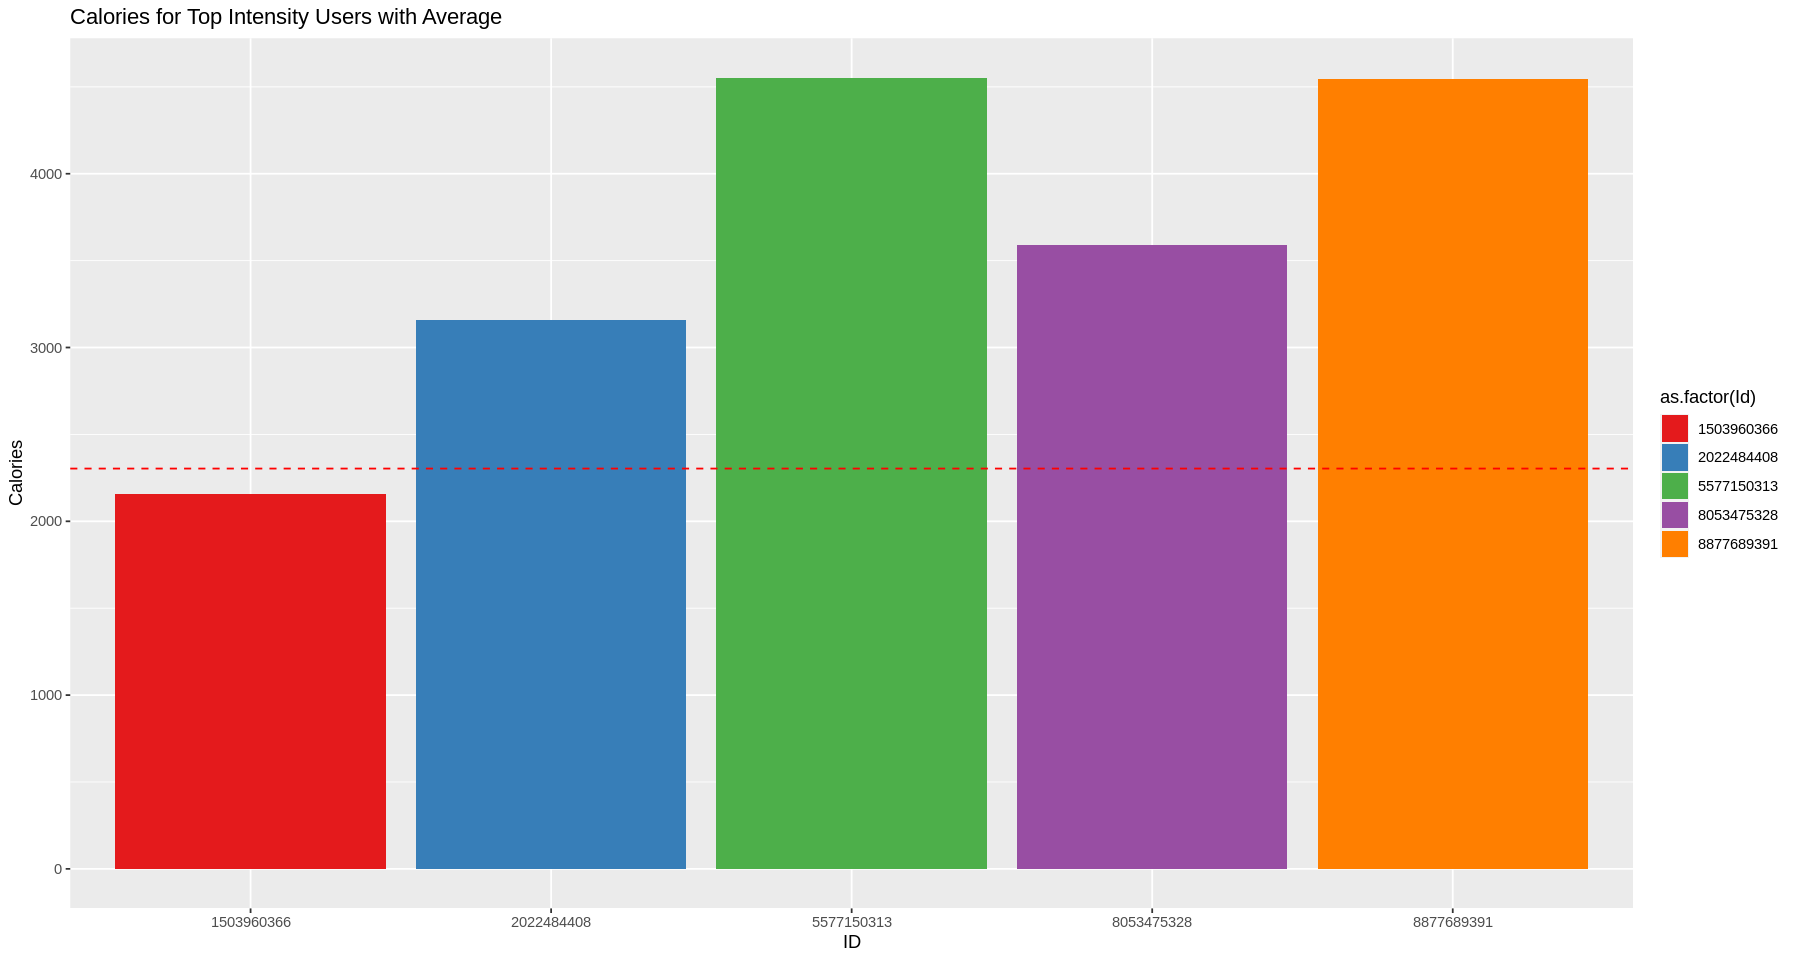

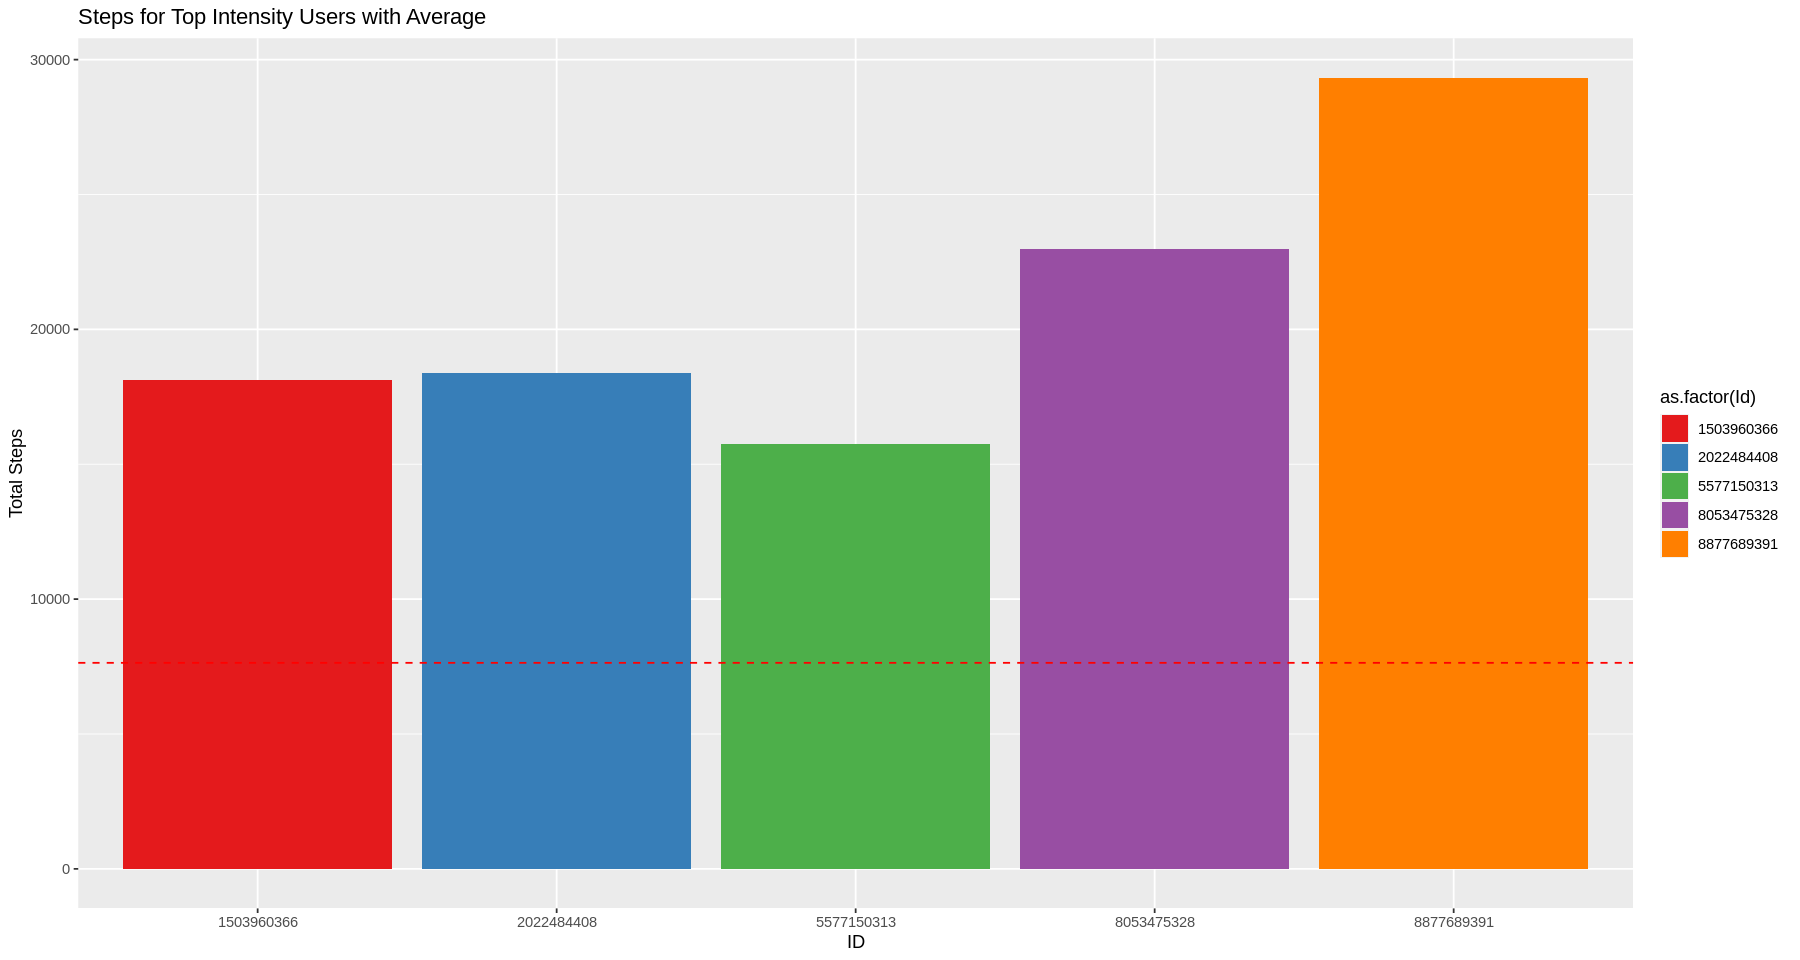

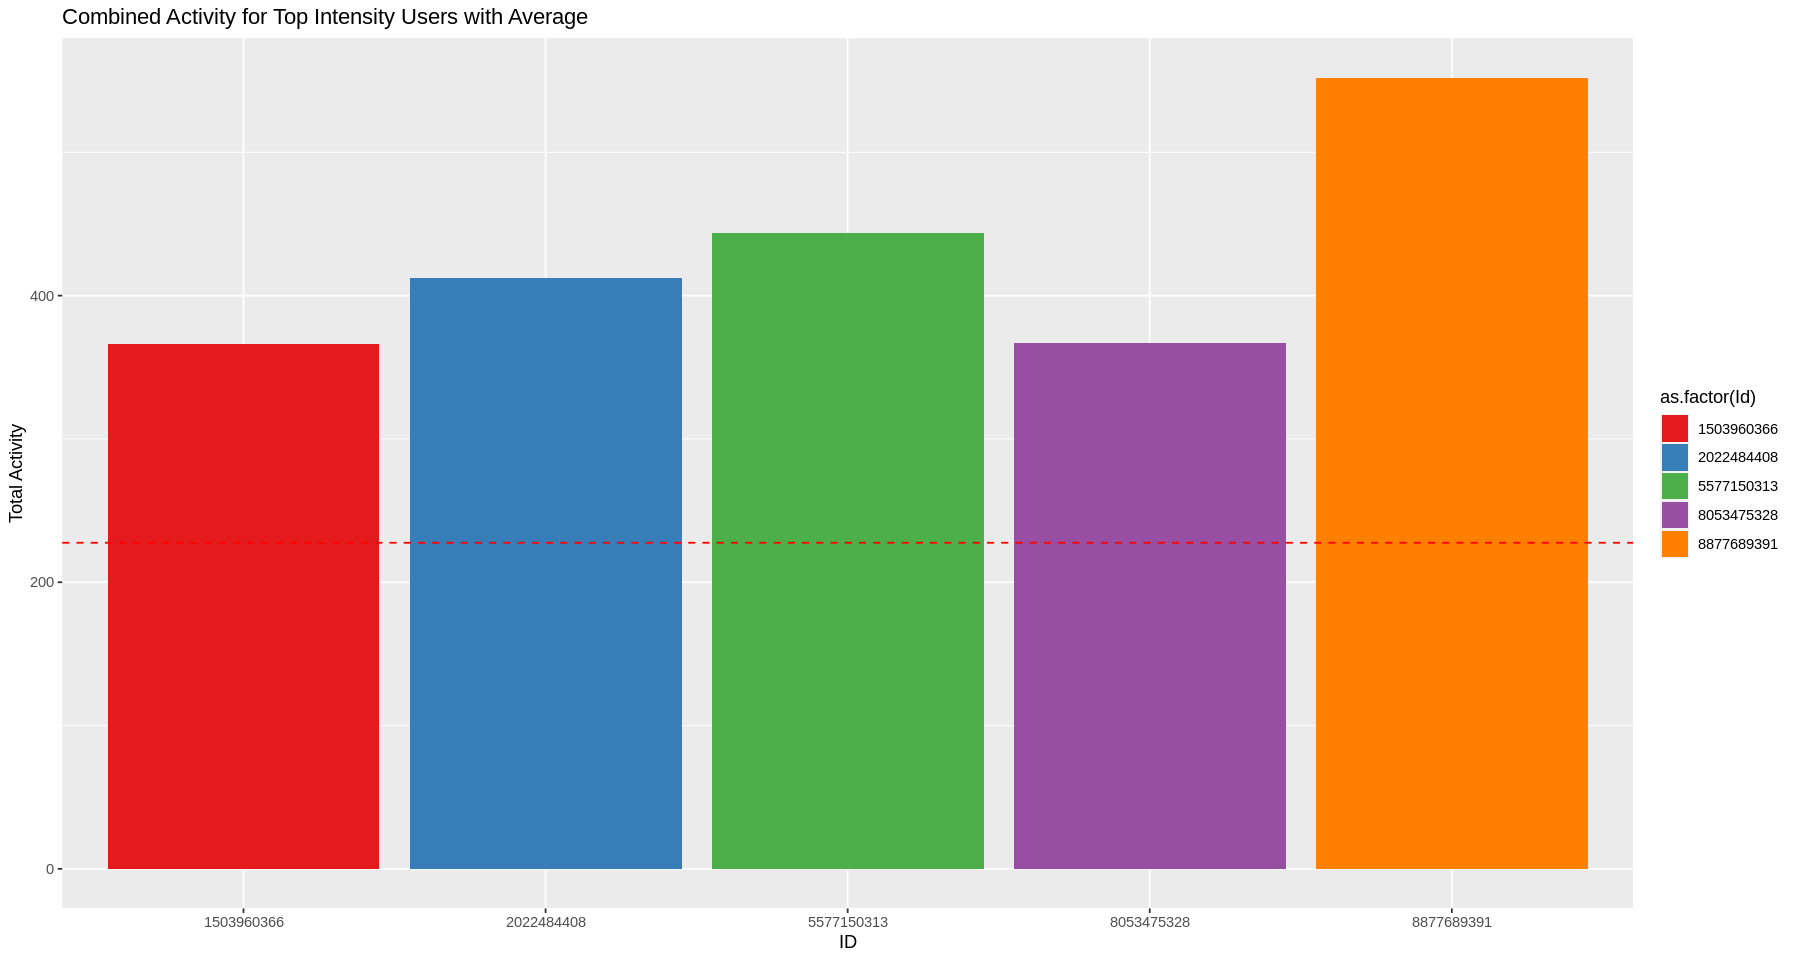

In [36]:
library(dplyr)
library(ggplot2)

# Find the top 5 users with the highest TotalIntensity
top_intensity_users <- intensities %>%
  group_by(Id) %>%
  summarise(TotalIntensity = sum(TotalIntensity, na.rm = TRUE)) %>%
  arrange(desc(TotalIntensity)) %>%
  head(5) %>%
  pull(Id)

# Filter 'activity' data for the top intensity user IDs
top_intensity_activity <- activity %>%
  filter(Id %in% top_intensity_users)

# Calculate average values for each category
average_values <- activity %>%
  summarise(
    avg_calories = mean(Calories),
    avg_steps = mean(TotalSteps),
    avg_combined_activity = mean(VeryActiveMinutes + FairlyActiveMinutes + LightlyActiveMinutes)
  )

# Set up the figure and axis for the bar plot
options(repr.plot.width=15, repr.plot.height=8)
par(mfrow=c(1,3))

# Bar plot for Calories for Top Intensity Users with Average
ggplot(top_intensity_activity, aes(x = factor(Id), y = Calories, fill = as.factor(Id))) +
  geom_bar(stat = "identity", position = "dodge") +
  geom_hline(yintercept = average_values$avg_calories, linetype = "dashed", color = "red") +
  labs(title = 'Calories for Top Intensity Users with Average', x = 'ID', y = 'Calories') +
  scale_fill_brewer(palette = "Set1")

# Bar plot for Steps for Top Intensity Users with Average
ggplot(top_intensity_activity, aes(x = factor(Id), y = TotalSteps, fill = as.factor(Id))) +
  geom_bar(stat = "identity", position = "dodge") +
  geom_hline(yintercept = average_values$avg_steps, linetype = "dashed", color = "red") +
  labs(title = 'Steps for Top Intensity Users with Average', x = 'ID', y = 'Total Steps') +
  scale_fill_brewer(palette = "Set1")

# Bar plot for Combined Activity for Top Intensity Users with Average
ggplot(top_intensity_activity, aes(x = factor(Id), y = VeryActiveMinutes + FairlyActiveMinutes + LightlyActiveMinutes, fill = as.factor(Id))) +
  geom_bar(stat = "identity", position = "dodge") +
  geom_hline(yintercept = average_values$avg_combined_activity, linetype = "dashed", color = "red") +
  labs(title = 'Combined Activity for Top Intensity Users with Average', x = 'ID', y = 'Total Activity') +
  scale_fill_brewer(palette = "Set1")

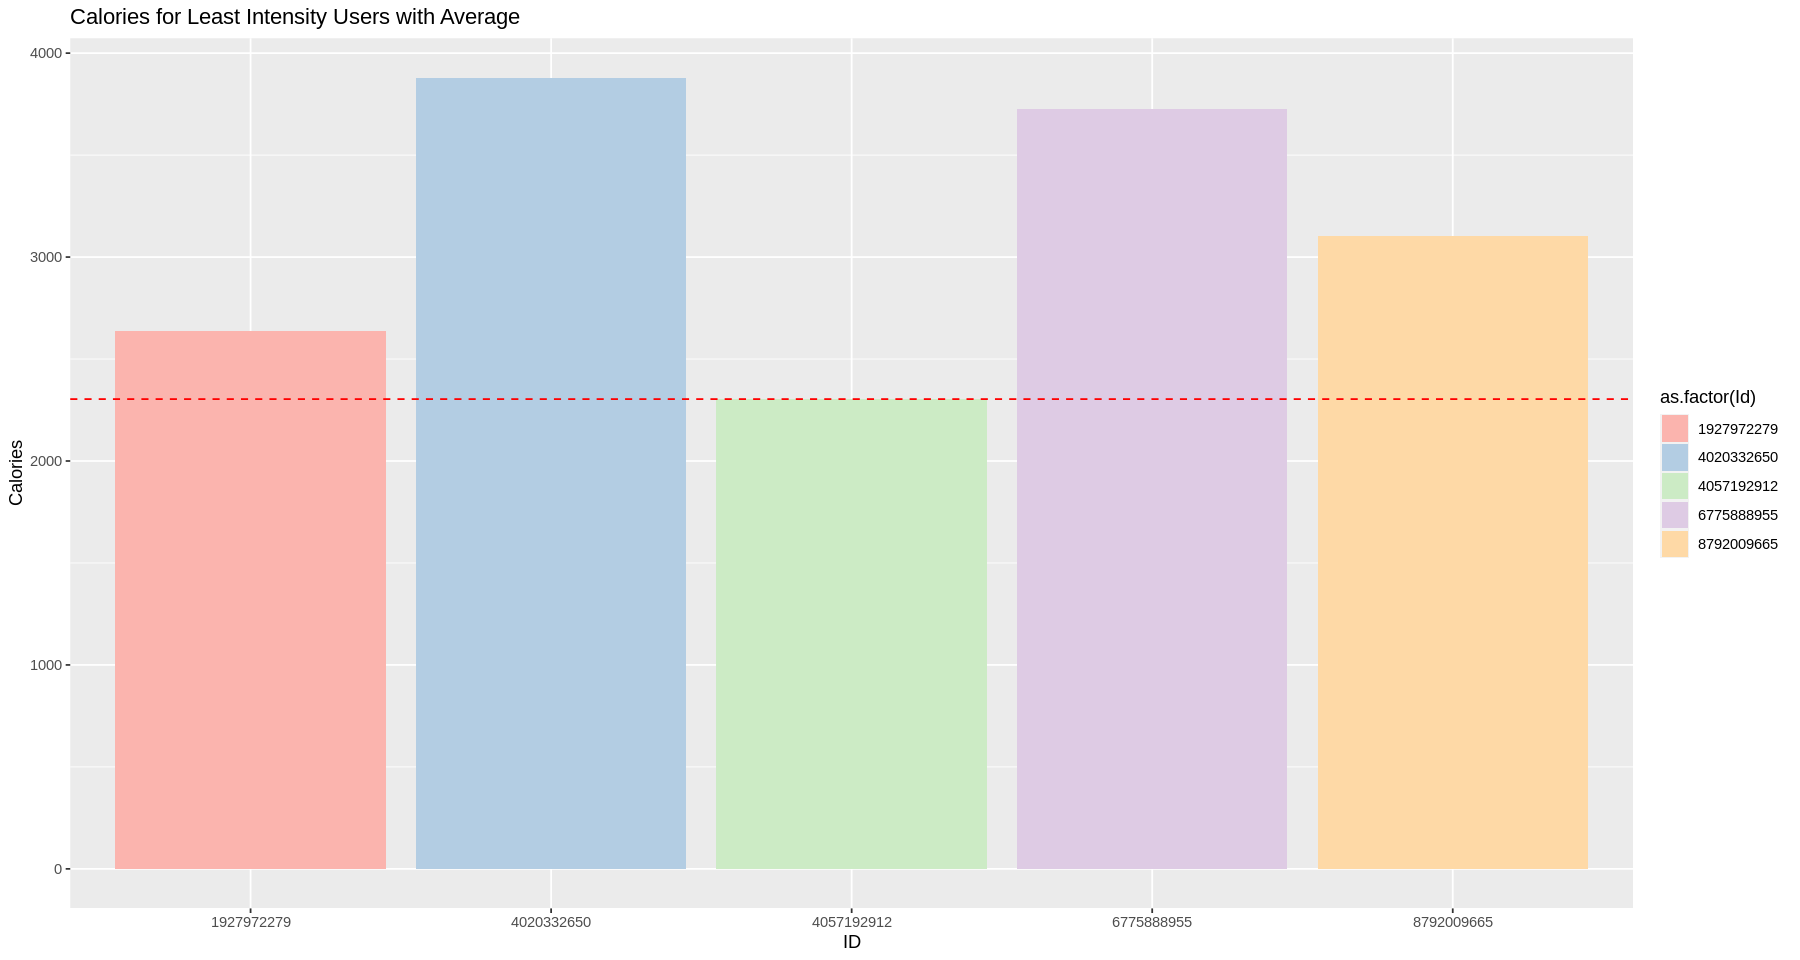

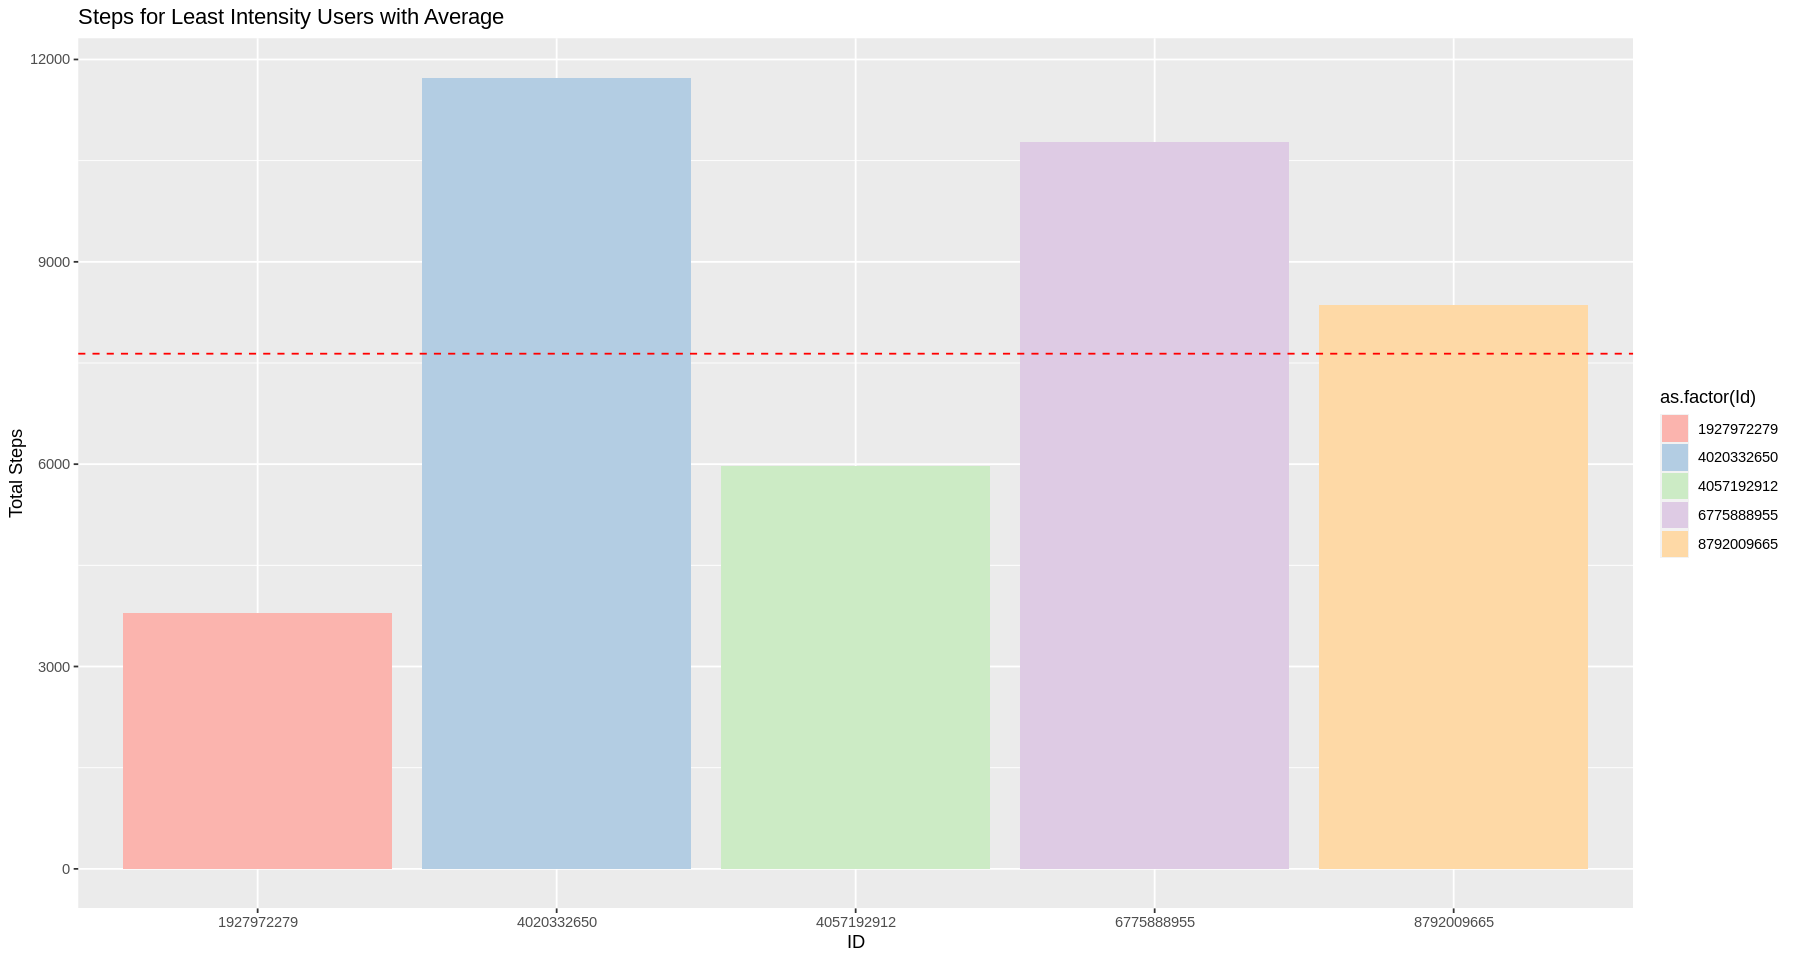

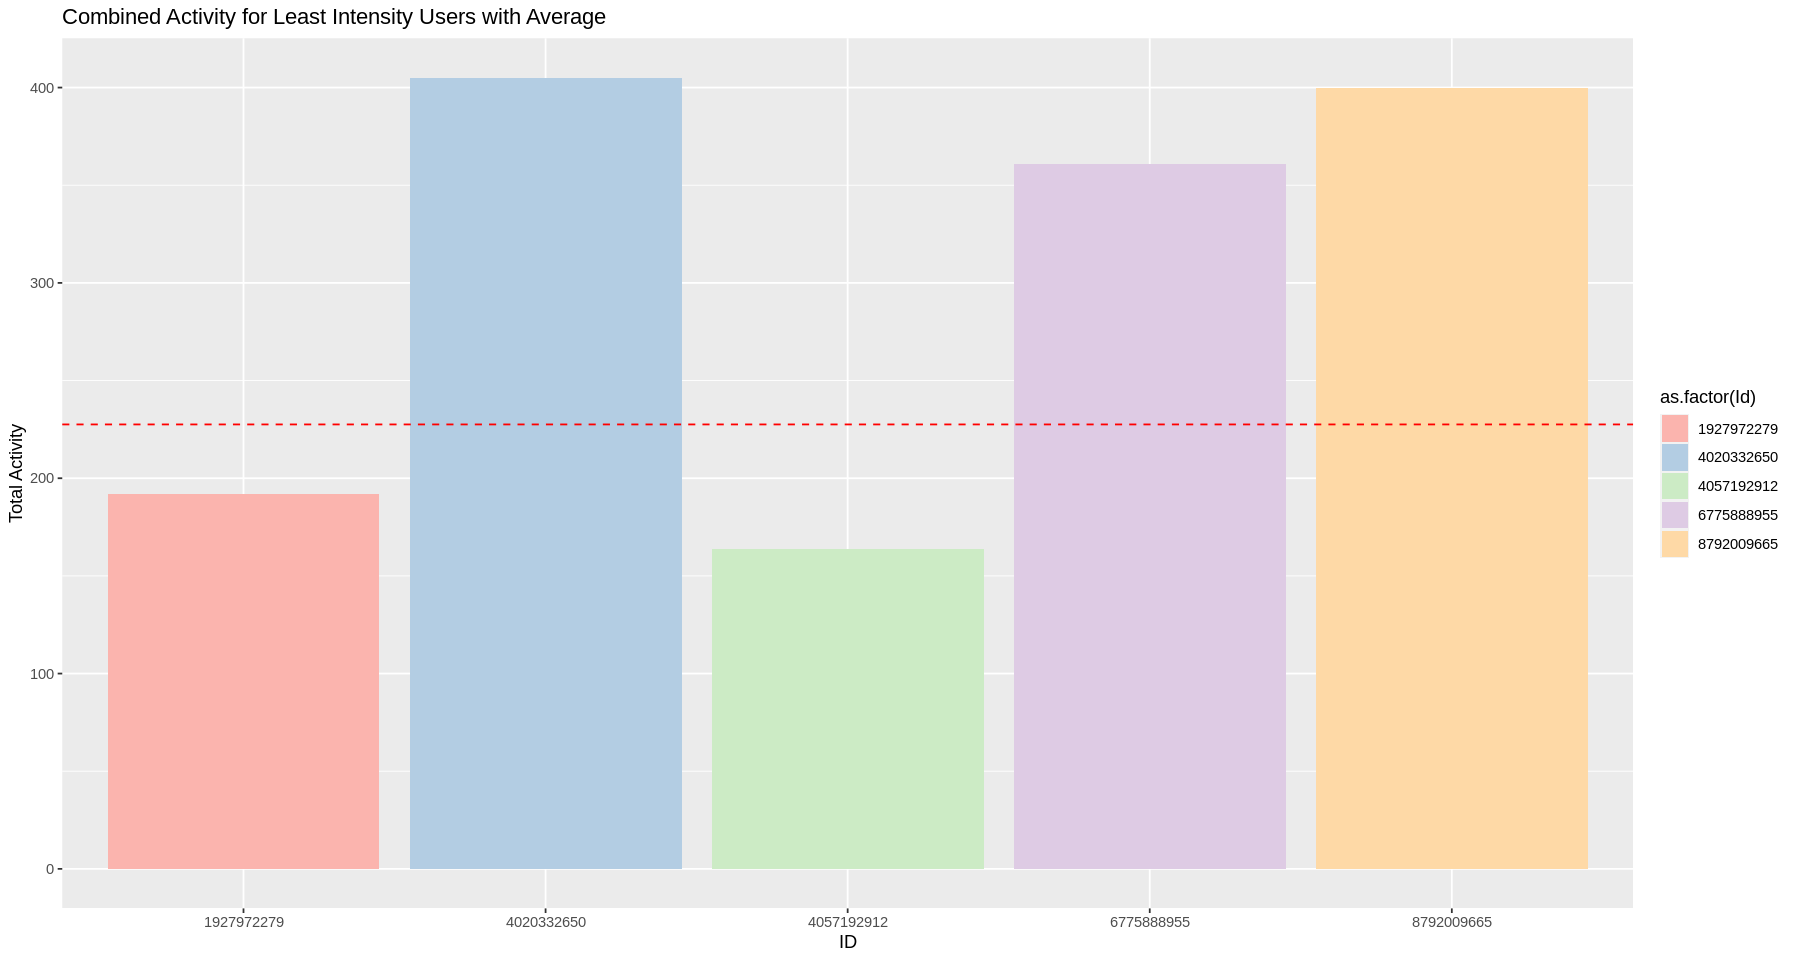

In [37]:
library(dplyr)
library(ggplot2)

# Find the 5 users with the lowest TotalIntensity
least_intensity_users <- intensities %>%
  group_by(Id) %>%
  summarise(TotalIntensity = sum(TotalIntensity, na.rm = TRUE)) %>%
  arrange(TotalIntensity) %>%
  head(5) %>%
  pull(Id)

# Filter 'activity' data for the least intensity user IDs
least_intensity_activity <- activity %>%
  filter(Id %in% least_intensity_users)

# Calculate average values for each category
average_values <- activity %>%
  summarise(
    avg_calories = mean(Calories),
    avg_steps = mean(TotalSteps),
    avg_combined_activity = mean(VeryActiveMinutes + FairlyActiveMinutes + LightlyActiveMinutes)
  )

# Set up the figure and axis for the bar plot
options(repr.plot.width=15, repr.plot.height=8)
par(mfrow=c(1,3))

# Bar plot for Calories for Least Intensity Users with Average
ggplot(least_intensity_activity, aes(x = factor(Id), y = Calories, fill = as.factor(Id))) +
  geom_bar(stat = "identity", position = "dodge") +
  geom_hline(yintercept = average_values$avg_calories, linetype = "dashed", color = "red") +
  labs(title = 'Calories for Least Intensity Users with Average', x = 'ID', y = 'Calories') +
  scale_fill_brewer(palette = "Pastel1")

# Bar plot for Steps for Least Intensity Users with Average
ggplot(least_intensity_activity, aes(x = factor(Id), y = TotalSteps, fill = as.factor(Id))) +
  geom_bar(stat = "identity", position = "dodge") +
  geom_hline(yintercept = average_values$avg_steps, linetype = "dashed", color = "red") +
  labs(title = 'Steps for Least Intensity Users with Average', x = 'ID', y = 'Total Steps') +
  scale_fill_brewer(palette = "Pastel1")

# Bar plot for Combined Activity for Least Intensity Users with Average
ggplot(least_intensity_activity, aes(x = factor(Id), y = VeryActiveMinutes + FairlyActiveMinutes + LightlyActiveMinutes, fill = as.factor(Id))) +
  geom_bar(stat = "identity", position = "dodge") +
  geom_hline(yintercept = average_values$avg_combined_activity, linetype = "dashed", color = "red") +
  labs(title = 'Combined Activity for Least Intensity Users with Average', x = 'ID', y = 'Total Activity') +
  scale_fill_brewer(palette = "Pastel1")